In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error  
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor





In [2]:

train_linear = pd.read_csv('train_linear.csv')
valid_linear = pd.read_csv('valid_linear.csv')
test_linear = pd.read_csv('test_linear.csv')


train_lasso = pd.read_csv('train_lasso.csv')
valid_lasso = pd.read_csv('valid_lasso.csv')
test_lasso = pd.read_csv('test_lasso.csv')

train_tree = pd.read_csv('train_tree.csv')
valid_tree = pd.read_csv('valid_tree.csv')
test_tree = pd.read_csv('test_tree.csv')



# Methodology

# Linear models

In [3]:
print('train_linear: {}'.format(train_linear.shape))
print('valid_linear: {}'.format(valid_linear.shape))
print('test_linear: {}'.format(test_linear.shape))

train_linear: (14144, 95)
valid_linear: (3536, 95)
test_linear: (4420, 95)


In [4]:
print('train_lasso: {}'.format(train_lasso.shape))
print('valid_lasso: {}'.format(valid_lasso.shape))
print('test_lasso: {}'.format(test_lasso.shape))

train_lasso: (14144, 99)
valid_lasso: (3536, 99)
test_lasso: (4420, 99)


### Linear regression

In [5]:
# To ensure a fair comparison with the Lasso, Ridge, and ElasticNet models, it will standardize the data when performing linear regression as well. 

# Standardisation-train set
scaled_train_linear = StandardScaler().fit_transform(train_linear)
scaled_train_linear_df = pd.DataFrame(scaled_train_linear, columns=train_linear.columns)
# Standardisation-validation set
scaled_valid_linear = StandardScaler().fit_transform(valid_linear)
scaled_valid_linear_df = pd.DataFrame(scaled_valid_linear, columns=valid_linear.columns)
# Standardisation-test set
scaled_test_linear = StandardScaler().fit_transform(test_linear)
scaled_test_linear_df = pd.DataFrame(scaled_test_linear, columns=test_linear.columns)


In [6]:
X_train_linear = scaled_train_linear_df.drop(['price','log_price'],axis = 1)
log_y_train_linear = scaled_train_linear_df['log_price']
y_train_linear = scaled_train_linear_df['price']
X_valid_linear = scaled_valid_linear_df.drop(['price','log_price'],axis = 1)
log_y_valid_linear = scaled_valid_linear_df['log_price']
y_valid_linear = scaled_valid_linear_df['price']

linear_regression = LinearRegression()
linear_regression.fit(X_train_linear.to_numpy(),log_y_train_linear)

print('Train:')
print('beta 0: {:.2f}'.format(linear_regression.intercept_))
for i in range(len(X_train_linear.columns)):
    print('beta {}: {:.2f}'.format(i+1, linear_regression.coef_[i]))



Train:
beta 0: 0.00
beta 1: -0.04
beta 2: -0.03
beta 3: 0.01
beta 4: 0.01
beta 5: 0.01
beta 6: 0.01
beta 7: 0.01
beta 8: -0.02
beta 9: 0.02
beta 10: 0.01
beta 11: -0.05
beta 12: -0.02
beta 13: 0.25
beta 14: 0.12
beta 15: -0.09
beta 16: 0.17
beta 17: -0.02
beta 18: -0.00
beta 19: 0.04
beta 20: 0.00
beta 21: -0.09
beta 22: 0.07
beta 23: 0.00
beta 24: -0.01
beta 25: -0.01
beta 26: 0.02
beta 27: -0.01
beta 28: 0.09
beta 29: 0.03
beta 30: 0.04
beta 31: 0.04
beta 32: 0.02
beta 33: -0.00
beta 34: -0.01
beta 35: 0.02
beta 36: 0.16
beta 37: -0.02
beta 38: 0.88
beta 39: -0.78
beta 40: -0.29
beta 41: -0.04
beta 42: -0.04
beta 43: -0.07
beta 44: 0.01
beta 45: 0.01
beta 46: 0.00
beta 47: -0.05
beta 48: -0.08
beta 49: -0.05
beta 50: 0.00
beta 51: -0.20
beta 52: -0.09
beta 53: 0.01
beta 54: -0.02
beta 55: -0.03
beta 56: 0.01
beta 57: 0.00
beta 58: -0.02
beta 59: -0.01
beta 60: 0.01
beta 61: -0.01
beta 62: -0.01
beta 63: -0.03
beta 64: -0.01
beta 65: -0.01
beta 66: 0.01
beta 67: -0.01
beta 68: -0.00
b

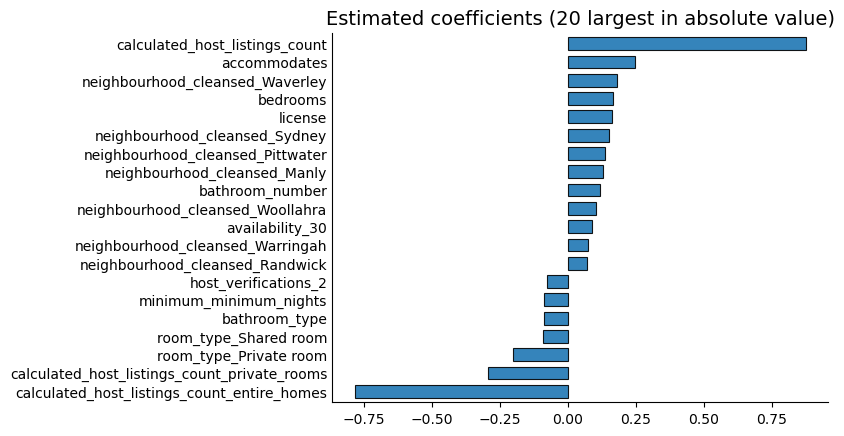

In [7]:
# Reference: From Tutorial 4 
def coefplot(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients (20 largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax
feature_names_linear = X_train_linear.columns
coefplot(linear_regression, feature_names_linear)
plt.show()

In [8]:
# Residuals
fit_train_linear = linear_regression.predict(X_train_linear.to_numpy())
residuals_train_linear = log_y_train_linear - fit_train_linear

fit_valid_linear = linear_regression.predict(X_valid_linear.to_numpy())
residuals_valid_linear = log_y_valid_linear - fit_valid_linear

# adjust 
adjust_train_linear = np.exp(residuals_train_linear).mean()
adjust_valid_linear = np.exp(residuals_valid_linear).mean()

pred_train_linear = np.exp(fit_train_linear) * adjust_train_linear
pred_valid_linear = np.exp(fit_valid_linear) * adjust_valid_linear



#### Validation set

In [9]:
# mse
mse_train_linear = mean_squared_error(y_train_linear, pred_train_linear)

# rmsle
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(1 + y_true) - np.log(1 + y_pred))))

# rmse
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics_linear = {
    'mse': mean_squared_error,
    'rmse': rmse,
    'mae': mean_absolute_error,
    'rmsle': rmsle,
    'r2': r2_score
}

metrics_linear_scores = {}
for metrics_linear_name, metrics_linear_func in metrics_linear.items():
    metrics_linear_score = metrics_linear_func(y_valid_linear, pred_valid_linear)
    metrics_linear_scores[metrics_linear_name] = metrics_linear_score.mean()

r2_score_linear = r2_score(log_y_valid_linear, fit_valid_linear)
metrics_linear_scores['r2'] = r2_score_linear

print('For log_price:')
print('\nTrain mse: {:.2f}'.format(mse_train_linear))
print('\nMetrics:')
for metric_linear_name, metric_linear_score in metrics_linear_scores.items():
    print('Validation {}: {:.2f}'.format(metric_linear_name, metric_linear_score))


For log_price:

Train mse: 11.79

Metrics:
Validation mse: 10.45
Validation rmse: 3.23
Validation mae: 2.19
Validation rmsle: 1.14
Validation r2: 0.74


#### Cross-Validation

In [10]:
cv_values = [4, 5, 6, 7]  
scoring_metrics = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'rmsle': make_scorer(rmsle),
    'r2': make_scorer(r2_score)
}

best_cv_linear = None
best_scores_linear = None

for cv in cv_values:
    scores_linear = {}
    for metric_name, scoring_metric in scoring_metrics.items():
        cv_scores_linear = cross_val_score(linear_regression, X_valid_linear, log_y_valid_linear, cv=cv, scoring=scoring_metric)
        scores_linear[metric_name] = cv_scores_linear.mean()
    
    if best_scores_linear is None or scores_linear['rmsle'] < best_scores_linear['rmsle']:
        best_cv_linear = cv
        best_scores_linear = scores_linear
    
    print(f"\nCV = {cv}")
    for metric_name, score in scores_linear.items():
        print(f"{metric_name}: {score:.2f}")

print(f"\nBest CV: {best_cv_linear}")
print("Best Scores:")
for metric_name, score in best_scores_linear.items():
    print(f"{metric_name}: {score:.2f}")



CV = 4
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.79
r2: 0.72

CV = 5
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.80
r2: 0.72

CV = 6
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.79
r2: 0.72

CV = 7
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.78
r2: 0.72

Best CV: 7
Best Scores:
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.78
r2: 0.72


#### Linear regression check assumption

##### 1) Zero conditional mean

In [11]:
residuals_mean_linear = residuals_train_linear.mean()
residuals_var_linear = residuals_train_linear.var()
print('residuals_mean_linear: {:.2f}'.format(residuals_mean_linear))
print('residuals_var_linear: {:.2f}'.format(residuals_var_linear))
# Not violating the assumption

residuals_mean_linear: -0.00
residuals_var_linear: 0.27


##### 2) Residual plot-Independent Random Errors

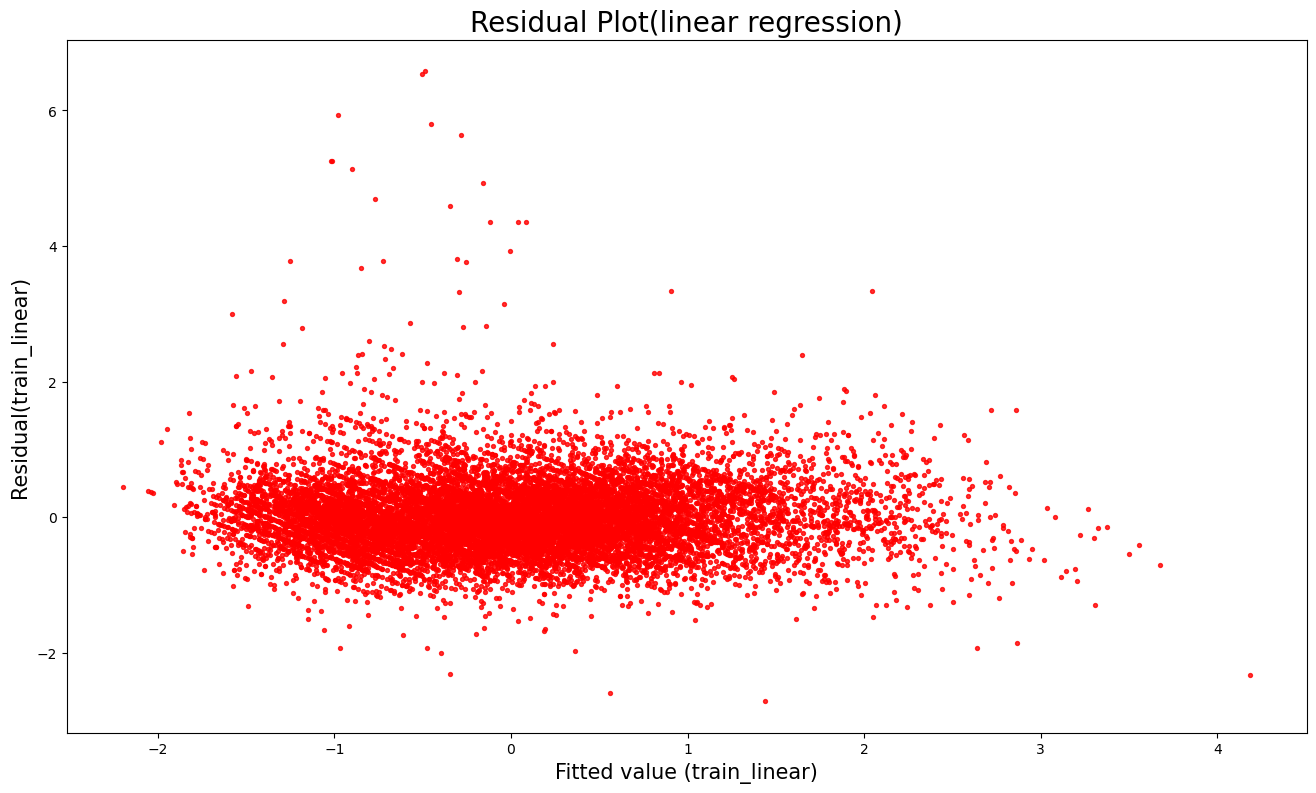

In [12]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_linear,residuals_train_linear,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_linear)',size = 15)
plt.ylabel('Residual(train_linear)',size = 15)
plt.title('Residual Plot(linear regression)',fontsize = 20)

plt.show()

# Not violating the assumption

##### 3) Squared residual plot-Constant Variance Random Errors

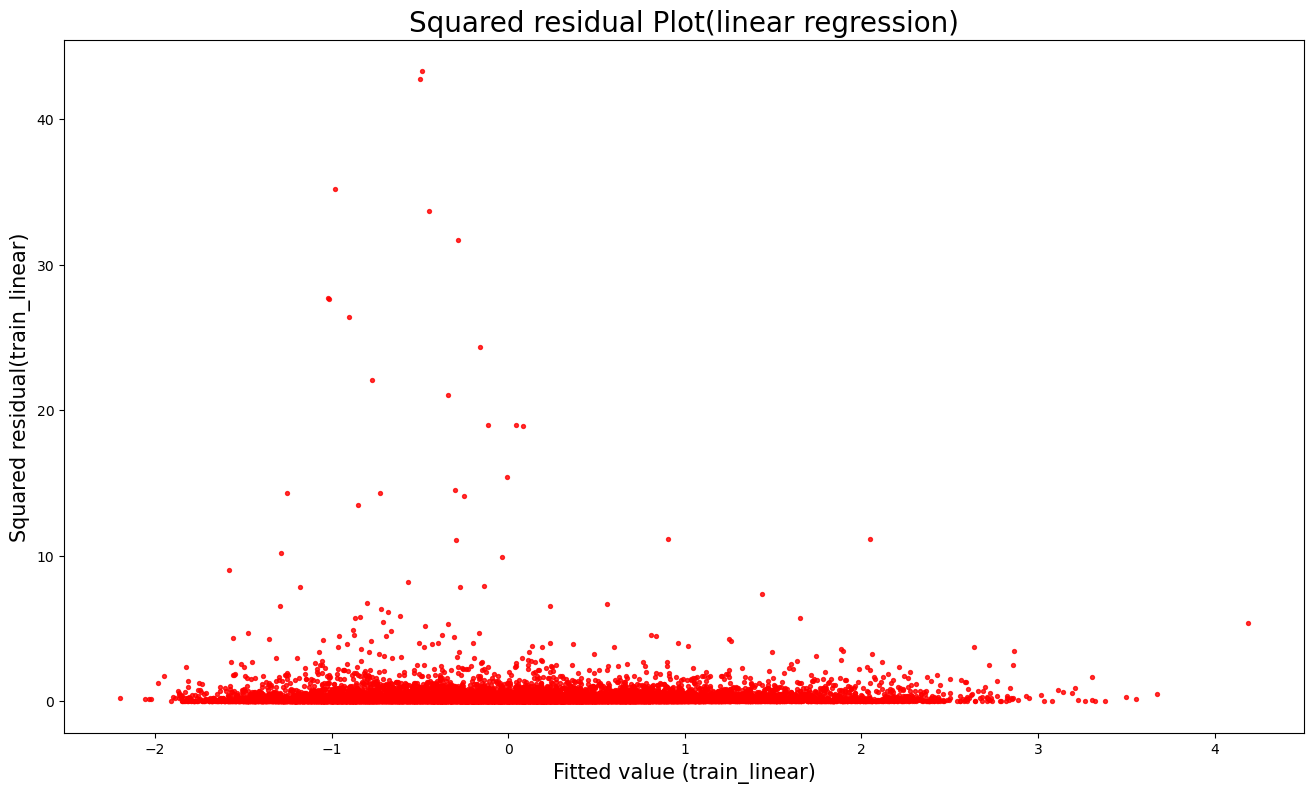

In [13]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_linear,residuals_train_linear**2,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_linear)',size = 15)
plt.ylabel('Squared residual(train_linear)',size = 15)
plt.title('Squared residual Plot(linear regression)',fontsize = 20)

plt.show()

# Violating the assumption


##### 4) Histogram -Normally Distributed Random Errors

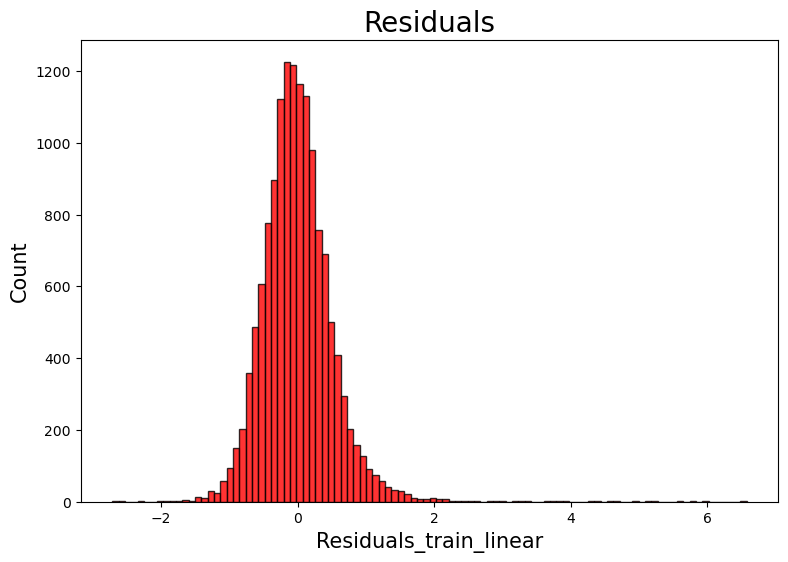

In [14]:
plt.figure(figsize = (9,6))
plt.hist(residuals_train_linear,bins = 100,color = 'red',edgecolor = 'black',alpha = 0.8)

plt.xlabel('Residuals_train_linear',size = 15)
plt.ylabel('Count',size = 15)
plt.title('Residuals',fontsize = 20)

plt.show()


# Not violating the assumption


### Lasso



In [15]:
train_linear.head()

,source,description,neighborhood_overview,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,neighbourhood_cleansed_Sydney,neighbourhood_cleansed_The Hills Shire,neighbourhood_cleansed_Warringah,neighbourhood_cleansed_Waverley,neighbourhood_cleansed_Willoughby,neighbourhood_cleansed_Woollahra,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1,1,0,2323.0,1,0,100.0,100.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,2310.0,1,0,0.0,100.0,0.0,1.0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,3083.0,1,0,100.0,95.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1231.0,0,0,100.0,100.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,770.0,0,0,100.0,100.0,0.0,8.0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
# Standardisation-train set
scaled_train_lasso = StandardScaler().fit_transform(train_lasso)
scaled_train_lasso_df = pd.DataFrame(scaled_train_lasso, columns=train_lasso.columns)
scaled_train_lasso_df.head()

,source,description,neighborhood_overview,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,neighbourhood_cleansed_The Hills Shire,neighbourhood_cleansed_Warringah,neighbourhood_cleansed_Waverley,neighbourhood_cleansed_Willoughby,neighbourhood_cleansed_Woollahra,host_response_time_Not Provided,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1.051673,0.260528,-0.860075,-0.084005,0.672758,-0.953701,0.231376,0.380530,-0.367135,-0.212002,...,-0.10248,-0.231762,-0.3884,-0.134412,-0.197115,0.964706,-0.157414,-0.238129,-0.307105,-0.682867
1,-0.950866,0.260528,1.162689,-0.098234,0.672758,-0.953701,-6.141087,0.380530,-0.367135,-0.212002,...,-0.10248,-0.231762,-0.3884,-0.134412,-0.197115,-1.036585,6.352694,-0.238129,-0.307105,-0.682867
2,-0.950866,0.260528,-0.860075,0.747854,0.672758,-0.953701,0.231376,0.112133,2.723793,-0.212002,...,-0.10248,-0.231762,-0.3884,-0.134412,-0.197115,-1.036585,-0.157414,-0.238129,-0.307105,1.464414
3,1.051673,0.260528,-0.860075,-1.279255,-1.486418,-0.953701,0.231376,0.380530,-0.367135,-0.212002,...,-0.10248,-0.231762,-0.3884,-0.134412,-0.197115,0.964706,-0.157414,-0.238129,-0.307105,-0.682867
4,-0.950866,-3.838364,-0.860075,-1.783843,-1.486418,-0.953701,0.231376,0.380530,-0.367135,-0.124590,...,-0.10248,-0.231762,-0.3884,7.439798,-0.197115,-1.036585,-0.157414,-0.238129,-0.307105,1.464414


In [17]:
# Standardisation-validation set
scaled_valid_lasso = StandardScaler().fit_transform(valid_lasso)
scaled_valid_lasso_df = pd.DataFrame(scaled_valid_lasso, columns=valid_lasso.columns)
scaled_valid_lasso_df.head()

,source,description,neighborhood_overview,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,neighbourhood_cleansed_The Hills Shire,neighbourhood_cleansed_Warringah,neighbourhood_cleansed_Waverley,neighbourhood_cleansed_Willoughby,neighbourhood_cleansed_Woollahra,host_response_time_Not Provided,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,-0.934812,0.256324,1.169102,-0.371050,-1.555548,-0.973209,0.234052,-1.350613,-0.369116,-0.215160,...,-0.106966,-0.231593,-0.402506,-0.129137,-0.202283,-1.038642,-0.155993,-0.24872,-0.307794,1.48324
1,1.069734,0.256324,-0.855357,1.607875,0.642860,1.027528,0.234052,0.371852,-0.369116,-0.215160,...,-0.106966,-0.231593,2.484434,-0.129137,-0.202283,0.962796,-0.155993,-0.24872,-0.307794,-0.67420
2,-0.934812,0.256324,-0.855357,0.936705,0.642860,1.027528,0.234052,0.371852,2.709174,-0.215160,...,-0.106966,-0.231593,-0.402506,-0.129137,-0.202283,-1.038642,-0.155993,-0.24872,-0.307794,1.48324
3,-0.934812,0.256324,1.169102,-2.498043,-1.555548,-0.973209,0.234052,0.371852,-0.369116,-0.215160,...,-0.106966,-0.231593,-0.402506,-0.129137,-0.202283,-1.038642,-0.155993,-0.24872,-0.307794,1.48324
4,-0.934812,0.256324,-0.855357,-0.210012,0.642860,-0.973209,0.234052,0.110872,-0.369116,-0.179945,...,-0.106966,-0.231593,-0.402506,-0.129137,-0.202283,-1.038642,-0.155993,-0.24872,-0.307794,1.48324


In [18]:
# Standardisation-test set
scaled_test_lasso = StandardScaler().fit_transform(test_lasso)
scaled_test_lasso_df = pd.DataFrame(scaled_test_lasso, columns=test_lasso.columns)
scaled_test_lasso_df.head()

,source,description,neighborhood_overview,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,neighbourhood_cleansed_The Hills Shire,neighbourhood_cleansed_Warringah,neighbourhood_cleansed_Waverley,neighbourhood_cleansed_Willoughby,neighbourhood_cleansed_Woollahra,host_response_time_Not Provided,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,-0.951837,0.266937,-0.854366,0.336611,0.669855,1.038760,0.228654,0.159579,-0.373849,-0.207156,...,-0.108042,-0.247436,-0.387869,-0.121212,-0.207231,-1.027993,-0.153695,-0.238559,-0.302255,1.439298
1,-0.951837,0.266937,-0.854366,0.606675,-1.492861,1.038760,0.228654,0.367475,2.674880,-0.139369,...,-0.108042,-0.247436,-0.387869,-0.121212,-0.207231,-1.027993,-0.153695,-0.238559,-0.302255,1.439298
2,-0.951837,0.266937,-0.854366,0.031274,-1.492861,-0.962687,0.228654,0.367475,-0.373849,-0.193598,...,-0.108042,-0.247436,-0.387869,-0.121212,-0.207231,-1.027993,-0.153695,-0.238559,3.308466,-0.694783
3,-0.951837,0.266937,1.170459,-1.845945,-1.492861,-0.962687,0.228654,0.367475,-0.373849,-0.220713,...,-0.108042,-0.247436,-0.387869,-0.121212,-0.207231,-1.027993,-0.153695,-0.238559,-0.302255,1.439298
4,-0.951837,0.266937,-0.854366,-1.069925,0.669855,-0.962687,0.228654,0.315501,2.674880,-0.220713,...,-0.108042,-0.247436,-0.387869,-0.121212,-0.207231,-1.027993,-0.153695,-0.238559,-0.302255,1.439298


In [19]:
X_train_lasso = scaled_train_lasso_df.drop(['price','log_price'],axis = 1)
log_y_train_lasso = scaled_train_lasso_df['log_price']
y_train_lasso = scaled_train_lasso_df['price']

X_valid_lasso = scaled_valid_lasso_df.drop(['price','log_price'],axis = 1)
log_y_valid_lasso = scaled_valid_lasso_df['log_price']
y_valid_lasso = scaled_valid_lasso_df['price']

lasso = LassoCV(random_state=1)
lasso.fit(X_train_lasso.to_numpy(),log_y_train_lasso)

print('Train:')
print('beta 0: {:.2f}'.format(lasso.intercept_))
for i in range(len(X_train_lasso.columns)):
    print('beta {}: {:.2f}'.format(i+1, lasso.coef_[i]))



Train:
beta 0: 0.00
beta 1: -0.04
beta 2: -0.03
beta 3: 0.01
beta 4: 0.01
beta 5: 0.01
beta 6: 0.01
beta 7: 0.01
beta 8: -0.02
beta 9: 0.02
beta 10: -0.00
beta 11: -0.03
beta 12: -0.01
beta 13: 0.24
beta 14: 0.12
beta 15: -0.09
beta 16: 0.17
beta 17: -0.01
beta 18: -0.00
beta 19: 0.00
beta 20: 0.00
beta 21: -0.05
beta 22: 0.06
beta 23: 0.00
beta 24: -0.00
beta 25: 0.00
beta 26: 0.00
beta 27: -0.01
beta 28: 0.09
beta 29: 0.03
beta 30: 0.04
beta 31: 0.04
beta 32: 0.02
beta 33: -0.00
beta 34: -0.01
beta 35: 0.02
beta 36: 0.16
beta 37: -0.01
beta 38: 0.00
beta 39: 0.04
beta 40: -0.02
beta 41: -0.02
beta 42: -0.04
beta 43: -0.07
beta 44: 0.01
beta 45: 0.00
beta 46: 0.00
beta 47: 0.00
beta 48: 0.00
beta 49: -0.00
beta 50: 0.01
beta 51: 0.20
beta 52: 0.04
beta 53: -0.00
beta 54: -0.04
beta 55: -0.01
beta 56: -0.00
beta 57: -0.03
beta 58: -0.05
beta 59: -0.01
beta 60: -0.01
beta 61: -0.02
beta 62: -0.02
beta 63: -0.00
beta 64: -0.03
beta 65: -0.02
beta 66: -0.04
beta 67: -0.01
beta 68: -0.03
b

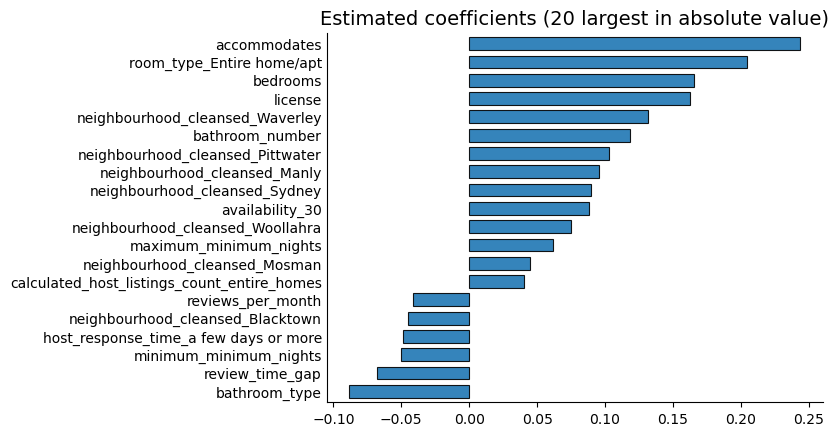

In [20]:
# Reference: From Tutorial 4 
def coefplot(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients (20 largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax
feature_names_lasso = X_train_lasso.columns
coefplot(lasso, feature_names_lasso)
plt.show()

In [21]:
# Residuals
fit_train_lasso = lasso.predict(X_train_lasso.to_numpy())
residuals_train_lasso = log_y_train_lasso - fit_train_lasso

fit_valid_lasso = lasso.predict(X_valid_lasso.to_numpy())
residuals_valid_lasso = log_y_valid_lasso - fit_valid_lasso

# adjust 
adjust_train_lasso = np.exp(residuals_train_lasso).mean()
adjust_valid_lasso = np.exp(residuals_valid_lasso).mean()

pred_train_lasso = np.exp(fit_train_lasso) * adjust_train_lasso
pred_valid_lasso = np.exp(fit_valid_lasso) * adjust_valid_lasso



#### Validation set

In [22]:
# mse
mse_train_lasso = mean_squared_error(y_train_lasso, pred_train_lasso)

# rmsle
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(1 + y_true) - np.log(1 + y_pred))))

# rmse
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics_lasso = {
    'mse': mean_squared_error,
    'rmse': rmse,
    'mae': mean_absolute_error,
    'rmsle': rmsle,
    'r2': r2_score
}

metrics_lasso_scores = {}
for metrics_lasso_name, metrics_lasso_func in metrics_lasso.items():
    metrics_lasso_score = metrics_lasso_func(y_valid_lasso, pred_valid_lasso)
    metrics_lasso_scores[metrics_lasso_name] = metrics_lasso_score.mean()

r2_score_lasso = r2_score(log_y_valid_lasso, fit_valid_lasso)
metrics_lasso_scores['r2'] = r2_score_lasso

print('For log_price:')
print('\nTrain mse: {:.2f}'.format(mse_train_lasso))
print('\nMetrics:')
for metric_lasso_name, metric_lasso_score in metrics_lasso_scores.items():
    print('Validation {}: {:.2f}'.format(metric_lasso_name, metric_lasso_score))


For log_price:

Train mse: 11.74

Metrics:
Validation mse: 10.00
Validation rmse: 3.16
Validation mae: 2.16
Validation rmsle: 1.14
Validation r2: 0.74


#### Cross-Validation

In [23]:
cv_values = [2, 3, 4, 5]  
scoring_metrics = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'rmsle': make_scorer(rmsle),
    'r2': make_scorer(r2_score)
}

best_cv_lasso = None
best_scores_lasso = None

for cv in cv_values:
    scores_lasso = {}
    for metric_name, scoring_metric in scoring_metrics.items():
        cv_scores_lasso = cross_val_score(lasso, X_valid_lasso, log_y_valid_lasso, cv=cv, scoring=scoring_metric)
        scores_lasso[metric_name] = cv_scores_lasso.mean()
    
    if best_scores_lasso is None or scores_lasso['rmsle'] < best_scores_lasso['rmsle']:
        best_cv_lasso = cv
        best_scores_lasso = scores_lasso
    
    print(f"\nCV = {cv}")
    for metric_name, score in scores_lasso.items():
        print(f"{metric_name}: {score:.2f}")

print(f"\nBest CV: {best_cv_lasso}")
print("Best Scores:")
for metric_name, score in best_scores_lasso.items():
    print(f"{metric_name}: {score:.2f}")



CV = 2
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.80
r2: 0.72

CV = 3
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.78
r2: 0.73

CV = 4
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.80
r2: 0.73

CV = 5
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.79
r2: 0.73

Best CV: 3
Best Scores:
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.78
r2: 0.73


In [24]:
print('There are {} preserved features.'.format(np.sum(lasso.coef_ != 0)))
print('There are {} eliminated features.'.format(np.sum(lasso.coef_ == 0)))

There are 86 preserved features.
There are 11 eliminated features.


In [25]:
X_train_lasso.columns[lasso.coef_ ==0]

Index(['host_listings_count', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'host_location*instant',
       'host_verifications_1', 'room_type_Private room',
       'neighbourhood_cleansed_Lane Cove',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object')

In [26]:
print('Lasso Lambda: {0:.2f}'.format(lasso.alpha_))

Lasso Lambda: 0.00


#### Linear regression check assumption

##### 1) Zero conditional mean

In [27]:
residuals_mean_lasso = residuals_train_lasso.mean()
residuals_var_lasso = residuals_train_lasso.var()
print('residuals_mean_lasso: {:.2f}'.format(residuals_mean_lasso))
print('residuals_var_lasso: {:.2f}'.format(residuals_var_lasso))
# Not violating the assumption

residuals_mean_lasso: 0.00
residuals_var_lasso: 0.27


##### 2) Residual plot-Independent Random Errors

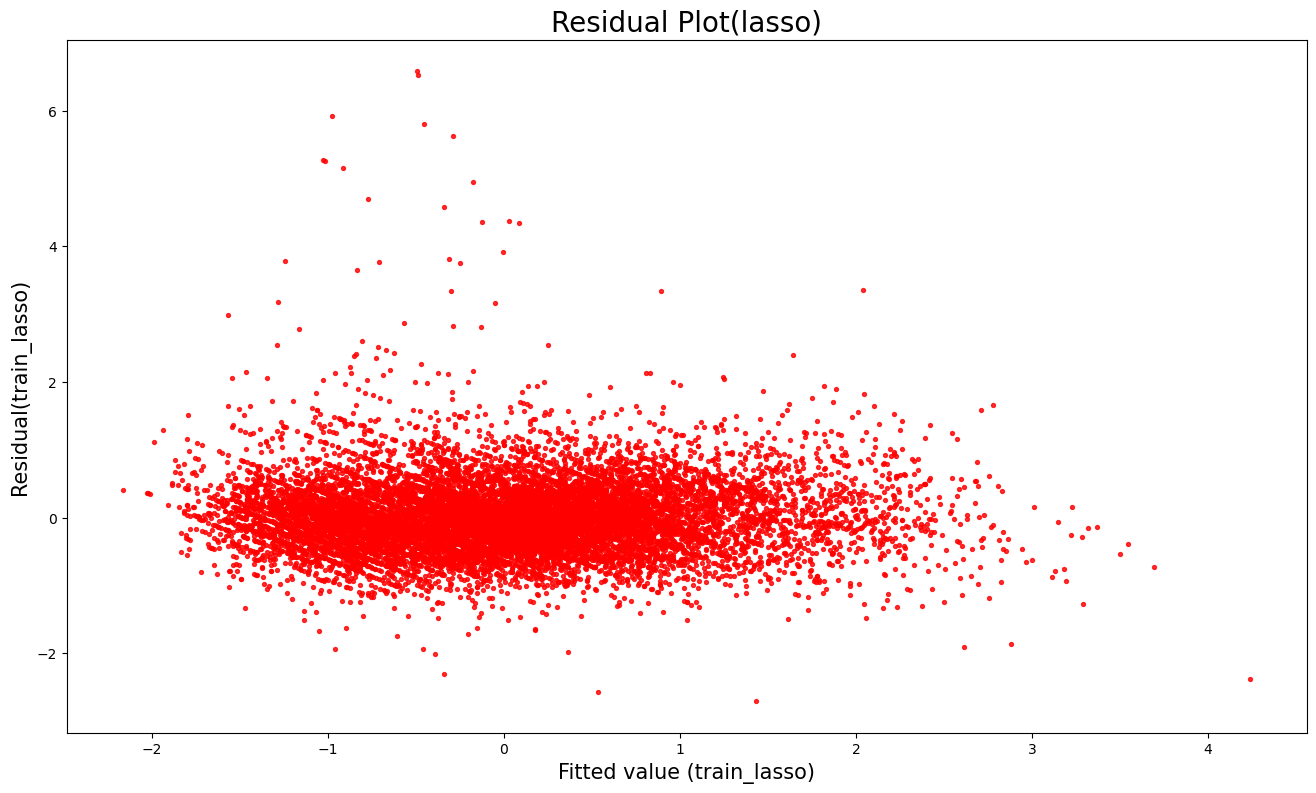

In [28]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_lasso,residuals_train_lasso,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_lasso)',size = 15)
plt.ylabel('Residual(train_lasso)',size = 15)
plt.title('Residual Plot(lasso)',fontsize = 20)

plt.show()

# Not violating the assumption

##### 3) Squared residual plot-Constant Variance Random Errors

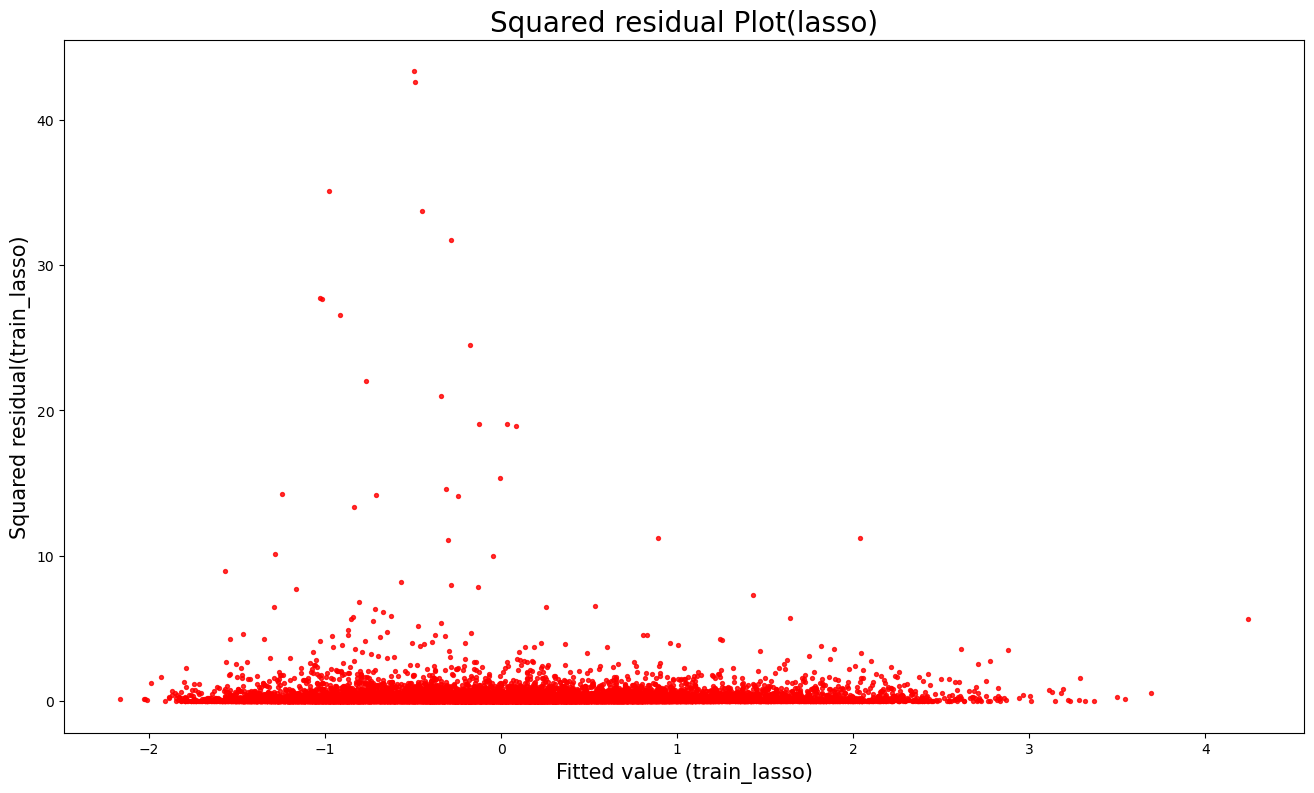

In [29]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_lasso,residuals_train_lasso**2,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_lasso)',size = 15)
plt.ylabel('Squared residual(train_lasso)',size = 15)
plt.title('Squared residual Plot(lasso)',fontsize = 20)

plt.show()

# Violating the assumption


##### 4) Q-Q plot & Histogram -Normally Distributed Random Errors

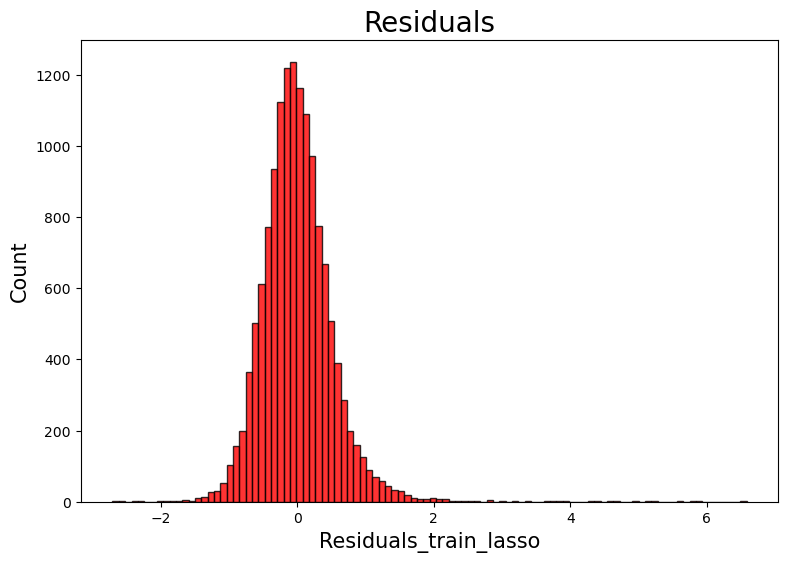

In [30]:
plt.figure(figsize = (9,6))
plt.hist(residuals_train_lasso,bins = 100,color = 'red',edgecolor = 'black',alpha = 0.8)

plt.xlabel('Residuals_train_lasso',size = 15)
plt.ylabel('Count',size = 15)
plt.title('Residuals',fontsize = 20)

plt.show()


# Not violating the assumption

### Ridge

In [31]:
train_ridge = train_lasso.copy()
valid_ridge = valid_lasso.copy()
test_ridge = test_lasso.copy()

In [32]:
# Standardisation-train set
scaled_train_ridge = StandardScaler().fit_transform(train_ridge)
scaled_train_ridge_df = pd.DataFrame(scaled_train_ridge, columns=train_ridge.columns)

# Standardisation-validation set
scaled_valid_ridge = StandardScaler().fit_transform(valid_ridge)
scaled_valid_ridge_df = pd.DataFrame(scaled_valid_ridge, columns=valid_ridge.columns)

# Standardisation-test set
scaled_test_ridge = StandardScaler().fit_transform(test_ridge)
scaled_test_ridge_df = pd.DataFrame(scaled_test_ridge, columns=test_ridge.columns)


In [33]:
X_train_ridge = scaled_train_ridge_df.drop(['price','log_price'], axis=1)
log_y_train_ridge = scaled_train_ridge_df['log_price']
y_train_ridge = scaled_train_ridge_df['price']

X_valid_ridge = scaled_valid_ridge_df.drop(['price','log_price'], axis=1)
log_y_valid_ridge = scaled_valid_ridge_df['log_price']
y_valid_ridge = scaled_valid_ridge_df['price']

ridge = RidgeCV()
ridge.fit(X_train_ridge.to_numpy(), log_y_train_ridge)

print('Train:')
print('beta 0: {:.2f}'.format(ridge.intercept_))
for i in range(len(X_train_ridge.columns)):
    print('beta {}: {:.2f}'.format(i+1, ridge.coef_[i]))


Train:
beta 0: 0.00
beta 1: -0.04
beta 2: -0.03
beta 3: 0.01
beta 4: 0.01
beta 5: 0.01
beta 6: 0.01
beta 7: 0.02
beta 8: -0.02
beta 9: 0.02
beta 10: 0.01
beta 11: -0.05
beta 12: -0.02
beta 13: 0.25
beta 14: 0.12
beta 15: -0.09
beta 16: 0.17
beta 17: -0.01
beta 18: -0.00
beta 19: 0.03
beta 20: 0.01
beta 21: -0.08
beta 22: 0.07
beta 23: -0.00
beta 24: -0.01
beta 25: -0.01
beta 26: 0.02
beta 27: -0.01
beta 28: 0.09
beta 29: 0.03
beta 30: 0.04
beta 31: 0.04
beta 32: 0.02
beta 33: -0.00
beta 34: -0.01
beta 35: 0.02
beta 36: 0.16
beta 37: -0.02
beta 38: 0.03
beta 39: 0.01
beta 40: -0.04
beta 41: -0.02
beta 42: -0.04
beta 43: -0.07
beta 44: 0.01
beta 45: 0.01
beta 46: 0.00
beta 47: 0.00
beta 48: -0.00
beta 49: -0.01
beta 50: 0.01
beta 51: 0.11
beta 52: 0.03
beta 53: -0.10
beta 54: -0.06
beta 55: -0.02
beta 56: -0.02
beta 57: -0.05
beta 58: -0.06
beta 59: -0.03
beta 60: -0.03
beta 61: -0.03
beta 62: -0.03
beta 63: -0.02
beta 64: -0.04
beta 65: -0.03
beta 66: -0.05
beta 67: -0.02
beta 68: -0.05

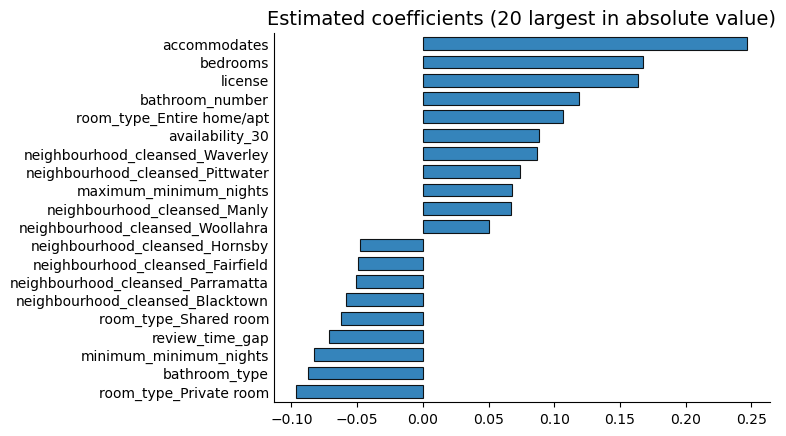

In [34]:
# Reference: From Tutorial 4 
def coefplot(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients (20 largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax
feature_names_ridge = X_train_ridge.columns
coefplot(ridge, feature_names_ridge)
plt.show()

In [35]:
fit_train_ridge = ridge.predict(X_train_ridge.to_numpy())
residuals_train_ridge = log_y_train_ridge - fit_train_ridge

fit_valid_ridge = ridge.predict(X_valid_ridge.to_numpy())
residuals_valid_ridge = log_y_valid_ridge - fit_valid_ridge

# adjust 
adjust_train_ridge = np.exp(residuals_train_ridge).mean()
adjust_valid_ridge = np.exp(residuals_valid_ridge).mean()

pred_train_ridge = np.exp(fit_train_ridge) * adjust_train_ridge
pred_valid_ridge = np.exp(fit_valid_ridge) * adjust_valid_ridge


#### Validation set

In [36]:
# mse
mse_train_ridge = mean_squared_error(y_train_ridge, pred_train_ridge)

# rmsle
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(1 + y_true) - np.log(1 + y_pred))))

# rmse
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics_ridge = {
    'mse': mean_squared_error,
    'rmse': rmse,
    'mae': mean_absolute_error,
    'rmsle': rmsle,
    'r2': r2_score
}

metrics_ridge_scores = {}
for metrics_ridge_name, metrics_ridge_func in metrics_ridge.items():
    metrics_ridge_score = metrics_ridge_func(y_valid_ridge, pred_valid_ridge)
    metrics_ridge_scores[metrics_ridge_name] = metrics_ridge_score.mean()

r2_score_ridge = r2_score(log_y_valid_ridge, fit_valid_ridge)
metrics_ridge_scores['r2'] = r2_score_ridge

print('For log_price:')
print('\nTrain mse: {:.2f}'.format(mse_train_ridge))
print('\nMetrics:')
for metric_ridge_name, metric_ridge_score in metrics_ridge_scores.items():
    print('Validation {}: {:.2f}'.format(metric_ridge_name, metric_ridge_score))


For log_price:

Train mse: 11.80

Metrics:
Validation mse: 10.20
Validation rmse: 3.19
Validation mae: 2.18
Validation rmsle: 1.14
Validation r2: 0.74


#### Cross-Validation

In [37]:
cv_values = [2, 3, 4, 5]  
scoring_metrics = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'rmsle': make_scorer(rmsle),
    'r2': make_scorer(r2_score)
}
best_cv_ridge = None
best_scores_ridge = None

for cv in cv_values:
    scores_ridge = {}
    for metric_name, scoring_metric in scoring_metrics.items():
        cv_scores_ridge = cross_val_score(ridge, X_valid_ridge, log_y_valid_ridge, cv=cv, scoring=scoring_metric)
        scores_ridge[metric_name] = cv_scores_ridge.mean()
    
    if best_scores_ridge is None or scores_ridge['rmsle'] < best_scores_ridge['rmsle']:
        best_cv_ridge = cv
        best_scores_ridge = scores_ridge
    
    print(f"\nCV = {cv}")
    for metric_name, score in scores_ridge.items():
        print(f"{metric_name}: {score:.2f}")

print(f"\nBest CV: {best_cv_ridge}")
print("Best Scores:")
for metric_name, score in best_scores_ridge.items():
    print(f"{metric_name}: {score:.2f}")



CV = 2
mse: 0.29
rmse: 0.29
mae: 0.39
rmsle: 0.80
r2: 0.71

CV = 3
mse: 0.29
rmse: 0.29
mae: 0.38
rmsle: 0.80
r2: 0.71

CV = 4
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.80
r2: 0.72

CV = 5
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.79
r2: 0.72

Best CV: 5
Best Scores:
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.79
r2: 0.72


In [38]:
print('There are {} preserved features.'.format(np.sum(ridge.coef_ != 0)))
print('There are {} eliminated features.'.format(np.sum(ridge.coef_ == 0)))

There are 97 preserved features.
There are 0 eliminated features.


In [39]:
print('Ridge Lambda: {0:.2f}'.format(ridge.alpha_))

Ridge Lambda: 10.00


#### Linear regression check assumption

##### 1) Zero conditional mean

In [40]:
residuals_mean_ridge = residuals_train_ridge.mean()
residuals_var_ridge = residuals_train_ridge.var()
print('residuals_mean_ridge: {:.2f}'.format(residuals_mean_ridge))
print('residuals_var_ridge: {:.2f}'.format(residuals_var_ridge))
# Not violating the assumption

residuals_mean_ridge: -0.00
residuals_var_ridge: 0.27


##### 2) Residual plot-Independent Random Errors

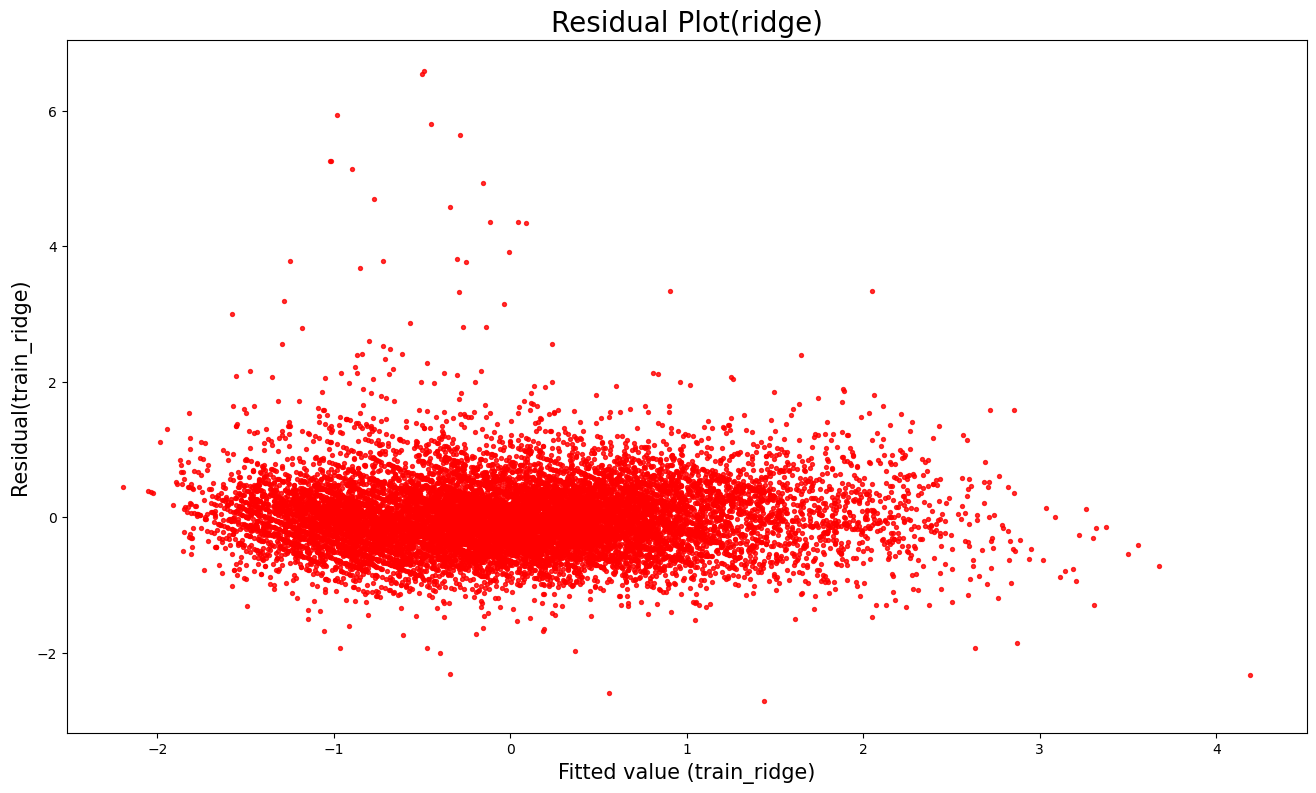

In [41]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_ridge,residuals_train_ridge,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_ridge)',size = 15)
plt.ylabel('Residual(train_ridge)',size = 15)
plt.title('Residual Plot(ridge)',fontsize = 20)

plt.show()

# Not violating the assumption

##### 3) Squared residual plot-Constant Variance Random Errors

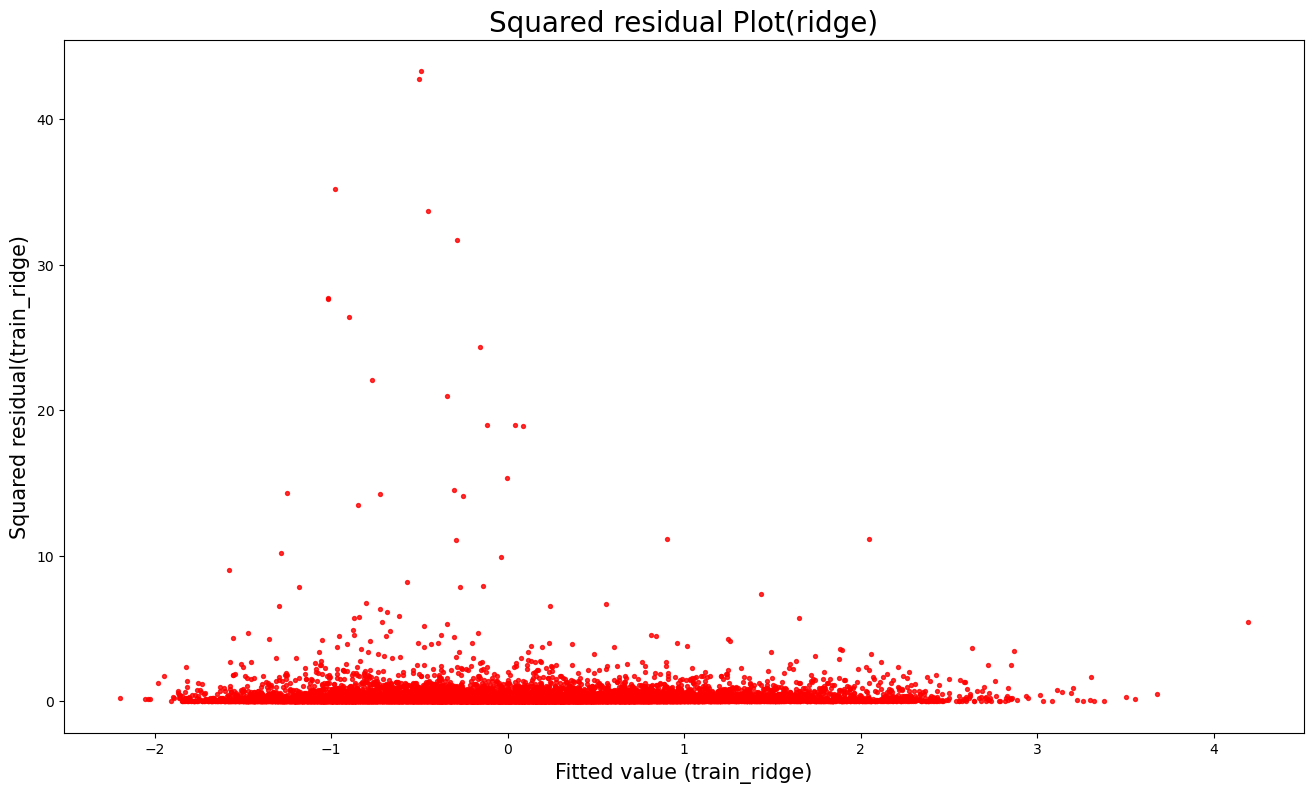

In [42]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_ridge,residuals_train_ridge**2,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_ridge)',size = 15)
plt.ylabel('Squared residual(train_ridge)',size = 15)
plt.title('Squared residual Plot(ridge)',fontsize = 20)

plt.show()

# Violating the assumption


##### 4) Q-Q plot & Histogram -Normally Distributed Random Errorsa

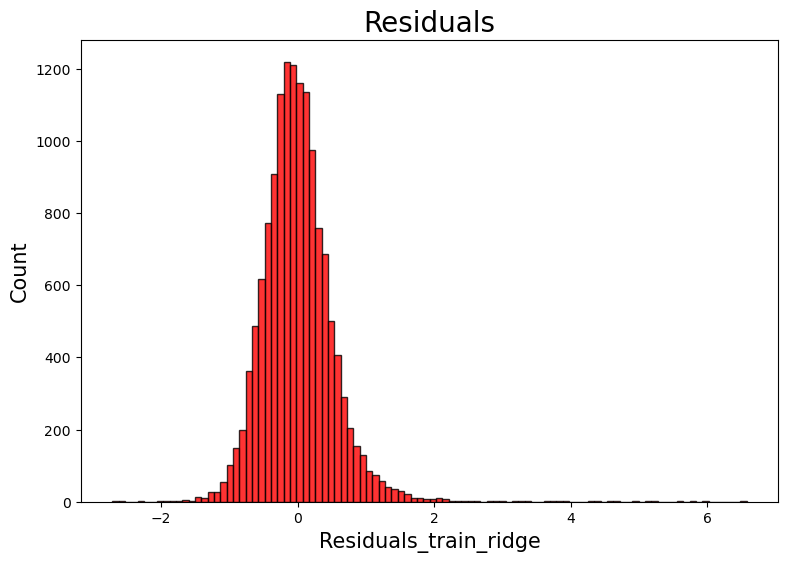

In [43]:
plt.figure(figsize = (9,6))
plt.hist(residuals_train_ridge,bins = 100,color = 'red',edgecolor = 'black',alpha = 0.8)

plt.xlabel('Residuals_train_ridge',size = 15)
plt.ylabel('Count',size = 15)
plt.title('Residuals',fontsize = 20)

plt.show()


# Not violating the assumption

### Elastic net

In [44]:

train_elastic= train_lasso.copy()
valid_elastic = valid_lasso.copy()
test_elastic = test_lasso.copy()

In [45]:
# Standardisation-train set
scaled_train_elastic = StandardScaler().fit_transform(train_elastic)
scaled_train_elastic_df = pd.DataFrame(scaled_train_elastic, columns=train_elastic.columns)

# Standardisation-validation set
scaled_valid_elastic = StandardScaler().fit_transform(valid_elastic)
scaled_valid_elastic_df = pd.DataFrame(scaled_valid_elastic, columns=valid_elastic.columns)

# Standardisation-test set
scaled_test_elastic = StandardScaler().fit_transform(test_elastic)
scaled_test_elastic_df = pd.DataFrame(scaled_test_elastic, columns=test_elastic.columns)


In [46]:
X_train_elastic = scaled_train_ridge_df.drop(['price', 'log_price'], axis=1)
log_y_train_elastic = scaled_train_ridge_df['log_price']
y_train_elastic = scaled_train_ridge_df['price']

X_valid_elastic = scaled_valid_ridge_df.drop(['price', 'log_price'], axis=1)
log_y_valid_elastic = scaled_valid_ridge_df['log_price']
y_valid_elastic = scaled_valid_ridge_df['price']

elastic_net = ElasticNetCV(l1_ratio=[0.01, 0.02, 0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 0.98, 0.99],
                  random_state=1)
elastic_net.fit(X_train_elastic.to_numpy(), log_y_train_elastic)

print('Train:')
print('beta 0: {:.2f}'.format(elastic_net.intercept_))
for i in range(len(X_train_elastic.columns)):
    print('beta {}: {:.2f}'.format(i+1, elastic_net.coef_[i]))


Train:
beta 0: 0.00
beta 1: -0.04
beta 2: -0.03
beta 3: 0.01
beta 4: 0.01
beta 5: 0.01
beta 6: 0.01
beta 7: 0.01
beta 8: -0.02
beta 9: 0.02
beta 10: -0.00
beta 11: -0.03
beta 12: -0.01
beta 13: 0.24
beta 14: 0.12
beta 15: -0.09
beta 16: 0.16
beta 17: -0.00
beta 18: -0.00
beta 19: 0.00
beta 20: 0.00
beta 21: -0.05
beta 22: 0.06
beta 23: 0.00
beta 24: -0.00
beta 25: 0.00
beta 26: 0.00
beta 27: -0.01
beta 28: 0.08
beta 29: 0.04
beta 30: 0.04
beta 31: 0.04
beta 32: 0.01
beta 33: -0.00
beta 34: -0.01
beta 35: 0.02
beta 36: 0.16
beta 37: -0.01
beta 38: 0.00
beta 39: 0.04
beta 40: -0.02
beta 41: -0.02
beta 42: -0.04
beta 43: -0.07
beta 44: 0.01
beta 45: 0.00
beta 46: 0.00
beta 47: 0.00
beta 48: 0.00
beta 49: -0.00
beta 50: 0.01
beta 51: 0.11
beta 52: 0.03
beta 53: -0.09
beta 54: -0.06
beta 55: -0.02
beta 56: -0.01
beta 57: -0.04
beta 58: -0.05
beta 59: -0.02
beta 60: -0.02
beta 61: -0.03
beta 62: -0.03
beta 63: -0.01
beta 64: -0.04
beta 65: -0.03
beta 66: -0.05
beta 67: -0.02
beta 68: -0.04
b

In [47]:
elastic_net.l1_ratio_

0.1

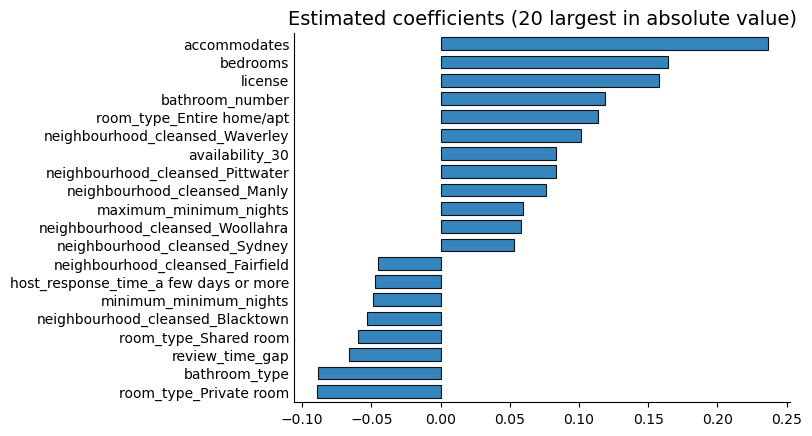

In [48]:
# Reference: From Tutorial 4 
def coefplot(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients (20 largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax
feature_names_elastic = X_train_elastic.columns
coefplot(elastic_net, feature_names_elastic)
plt.show()

In [49]:
fit_train_elastic = elastic_net.predict(X_train_elastic.to_numpy())
residuals_train_elastic = log_y_train_elastic - fit_train_elastic

fit_valid_elastic = elastic_net.predict(X_valid_elastic.to_numpy())
residuals_valid_elastic = log_y_valid_elastic - fit_valid_elastic

# adjust
adjust_train_elastic = np.exp(residuals_train_elastic).mean()
adjust_valid_elastic = np.exp(residuals_valid_elastic).mean()

pred_train_elastic = np.exp(fit_train_elastic) * adjust_train_elastic
pred_valid_elastic = np.exp(fit_valid_elastic) * adjust_valid_elastic


#### Validation set

In [50]:
# mse
mse_train_elastic = mean_squared_error(y_train_elastic, pred_train_elastic)

# rmsle
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(1 + y_true) - np.log(1 + y_pred))))

# rmse
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics_elastic = {
    'mse': mean_squared_error,
    'rmse': rmse,
    'mae': mean_absolute_error,
    'rmsle': rmsle,
    'r2': r2_score
}

metrics_elastic_scores = {}
for metrics_elastic_name, metrics_elastic_func in metrics_elastic.items():
    metrics_elastic_score = metrics_elastic_func(y_valid_elastic, pred_valid_elastic)
    metrics_elastic_scores[metrics_elastic_name] = metrics_elastic_score.mean()

r2_score_elastic = r2_score(log_y_valid_elastic, fit_valid_elastic)
metrics_elastic_scores['r2'] = r2_score_elastic

print('For log_price:')
print('\nTrain mse: {:.2f}'.format(mse_train_elastic))
print('\nMetrics:')
for metric_elastic_name, metric_elastic_score in metrics_elastic_scores.items():
    print('Validation {}: {:.2f}'.format(metric_elastic_name, metric_elastic_score))


For log_price:

Train mse: 11.72

Metrics:
Validation mse: 9.90
Validation rmse: 3.15
Validation mae: 2.16
Validation rmsle: 1.14
Validation r2: 0.74


#### Cross-Validation

In [51]:
cv_values = [2, 3, 4, 5]  
scoring_metrics = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'rmsle': make_scorer(rmsle),
    'r2': make_scorer(r2_score)
}
best_cv_elastic = None
best_scores_elastic = None

for cv in cv_values:
    scores_elastic = {}
    for metric_name, scoring_metric in scoring_metrics.items():
        cv_scores_elastic = cross_val_score(elastic_net, X_valid_elastic, log_y_valid_elastic, cv=cv, scoring=scoring_metric)
        scores_elastic[metric_name] = cv_scores_elastic.mean()
    
    if best_scores_elastic is None or scores_elastic['rmsle'] < best_scores_elastic['rmsle']:
        best_cv_elastic = cv
        best_scores_elastic = scores_elastic
    
    print(f"\nCV = {cv}")
    for metric_name, score in scores_elastic.items():
        print(f"{metric_name}: {score:.2f}")

print(f"\nBest CV: {best_cv_elastic}")
print("Best Scores:")
for metric_name, score in best_scores_elastic.items():
    print(f"{metric_name}: {score:.2f}")



CV = 2
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.79
r2: 0.72

CV = 3
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.77
r2: 0.73

CV = 4
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.81
r2: 0.73

CV = 5
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.79
r2: 0.73

Best CV: 3
Best Scores:
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.77
r2: 0.73


In [52]:
print('There are {} preserved features.'.format(np.sum(elastic_net.coef_ != 0)))
print('There are {} eliminated features.'.format(np.sum(elastic_net.coef_ == 0)))

There are 85 preserved features.
There are 12 eliminated features.


In [53]:
X_train_elastic.columns[elastic_net.coef_ ==0]

Index(['host_listings_count', 'minimum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'host_location*instant',
       'host_verifications_1', 'neighbourhood_cleansed_Leichhardt',
       'neighbourhood_cleansed_Sutherland Shire',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object')

In [54]:
print('Elastic Net Lambda: {0:.2f}'.format(elastic_net.alpha_))

Elastic Net Lambda: 0.01


#### Linear regression check assumption

##### 1) Zero conditional mean

In [55]:
residuals_mean_elastic = residuals_train_elastic.mean()
residuals_var_elastic = residuals_train_elastic.var()
print('residuals_mean_elastic: {:.2f}'.format(residuals_mean_elastic))
print('residuals_var_elastic: {:.2f}'.format(residuals_var_elastic))
# Not violating the assumption

residuals_mean_elastic: -0.00
residuals_var_elastic: 0.27


##### 2) Residual plot-Independent Random Errors

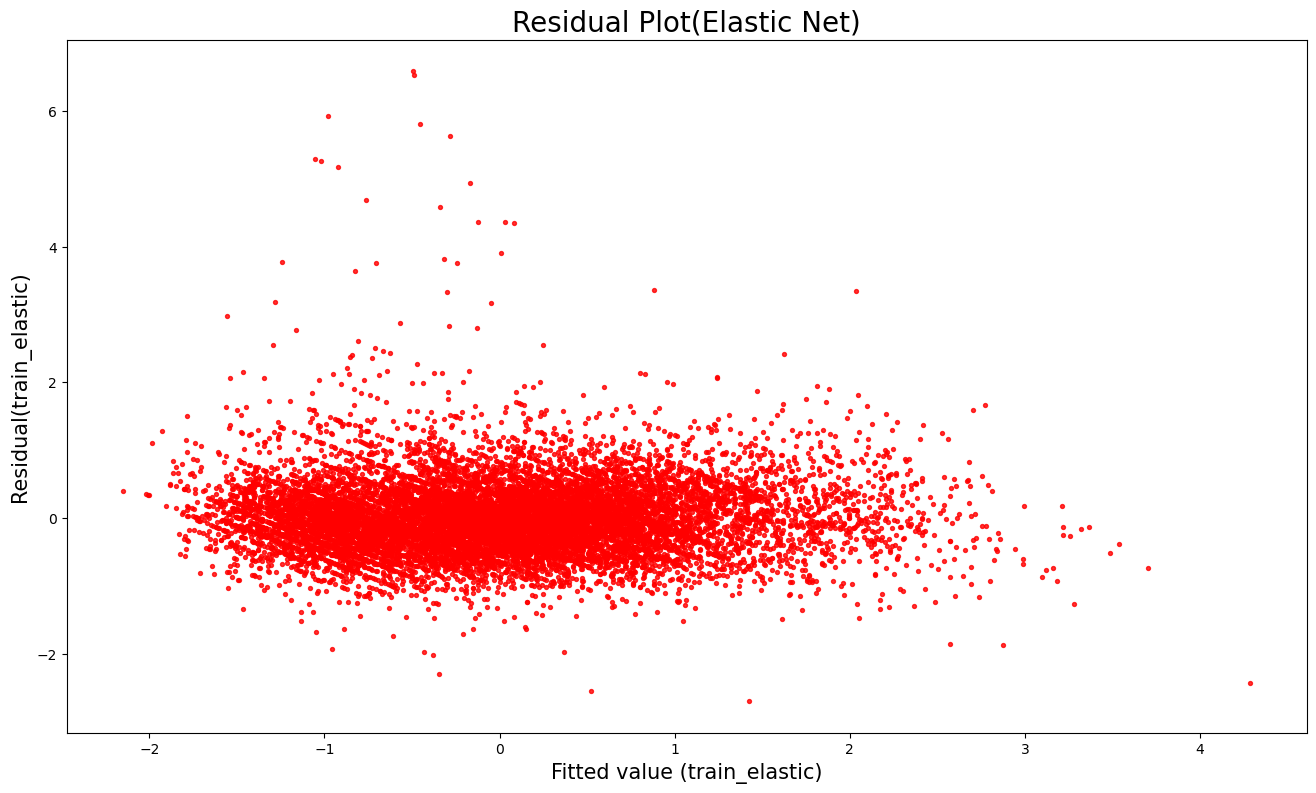

In [56]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_elastic,residuals_train_elastic,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_elastic)',size = 15)
plt.ylabel('Residual(train_elastic)',size = 15)
plt.title('Residual Plot(Elastic Net)',fontsize = 20)

plt.show()

# Not violating the assumption

##### 3) Squared residual plot-Constant Variance Random Errors

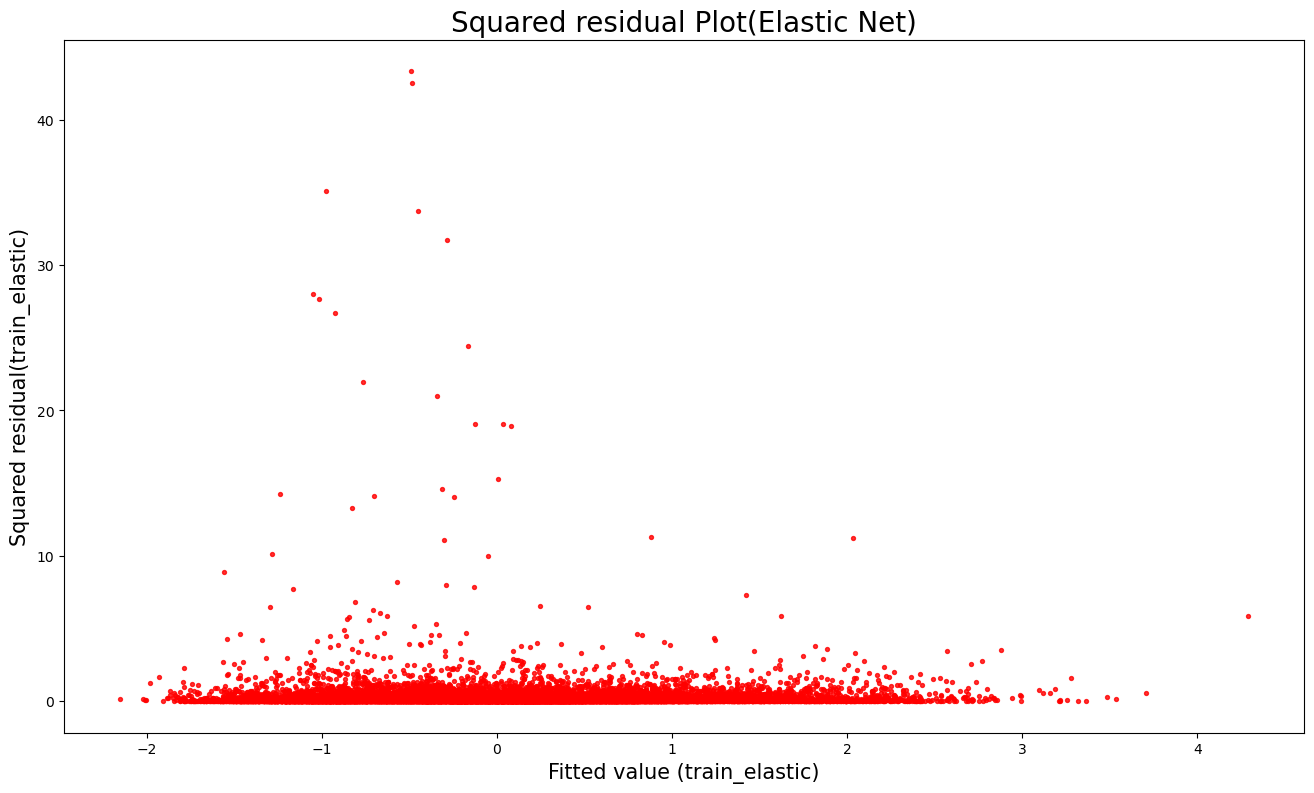

In [57]:
plt.figure(figsize = (16,9))
plt.scatter(fit_train_elastic,residuals_train_elastic**2,marker = 'o', s = 8, c = 'red',alpha = 0.8)

plt.xlabel('Fitted value (train_elastic)',size = 15)
plt.ylabel('Squared residual(train_elastic)',size = 15)
plt.title('Squared residual Plot(Elastic Net)',fontsize = 20)

plt.show()

# Violating the assumption


##### 4) Q-Q plot & Histogram -Normally Distributed Random Errorsa

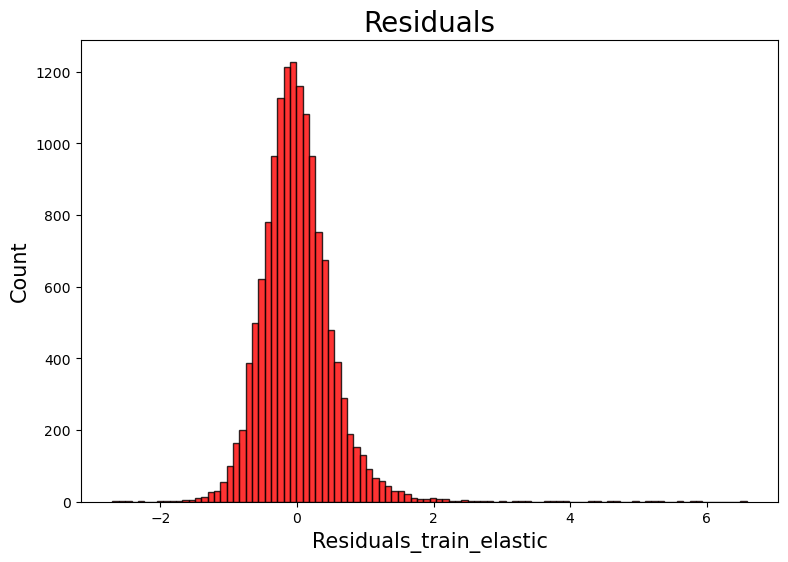

In [58]:
plt.figure(figsize = (9,6))
plt.hist(residuals_train_elastic,bins = 100,color = 'red',edgecolor = 'black',alpha = 0.8)

plt.xlabel('Residuals_train_elastic',size = 15)
plt.ylabel('Count',size = 15)
plt.title('Residuals',fontsize = 20)

plt.show()


# Not violating the assumption

# Tree

In [59]:
train_tree = pd.read_csv('train_tree.csv')
valid_tree = pd.read_csv('valid_tree.csv')
test_tree = pd.read_csv('test_tree.csv')

In [60]:
train_tree.shape

(14144, 99)

In [61]:
X_train_tree = train_tree.drop(columns = ["log_price", "price"])
X_valid_tree = valid_tree.drop(columns = ["log_price", "price"])

y_train_tree = train_tree["log_price"]
y_valid_tree = valid_tree["log_price"]

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

In [63]:
# Useful code from the 9th tutorial 
def plot_feature_importance(model, labels, max_features = 20):
    feature_importance = model.feature_importances_*100
    feature_importance = 100*(feature_importance/np.max(feature_importance))
    table = pd.Series(feature_importance, index = labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(9,6))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    else:
        table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title('Variable importance', fontsize=13)
    sns.despine()
    return fig, ax



## DecisionTree 

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=0)

In [65]:
dt.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=3, random_state=0)

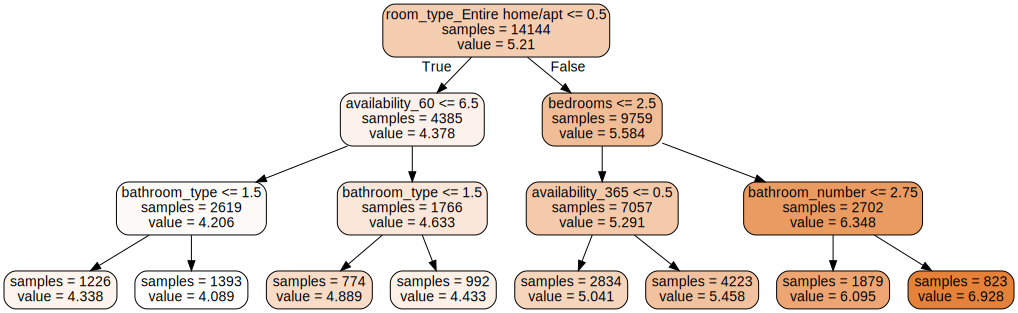

In [66]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = X_train_tree.columns

dot_data = export_graphviz(dt, max_depth=3, impurity=False, feature_names=feature_names, rounded=True,
                           filled=True)
graph = graphviz.Source(dot_data)
graph
#graph.render('Tree')

In [67]:
#residuals
pred_train_tree = dt.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = dt.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [68]:
#train Metrics
mse_train_dt = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_dt = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_dt = r2_score(y_train_tree, pred_train_tree) 

In [69]:
print(f"MSE: {mse_train_dt:.3f}")
print(f"RMSLE: {rmsle_train_dt:.3f}")
print(f"R2: {r2_train_dt:.3f}")

MSE: 202781.407
RMSLE: 3.766
R2: 0.604


In [70]:
#Valid Metrics
mse_valid_dt = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_dt = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_dt = r2_score(y_valid_tree, pred_valid_tree) 

In [71]:
print(f"MSE: {mse_valid_dt:.3f}")
print(f"RMSLE: {rmsle_valid_dt:.3f}")
print(f"R2: {r2_valid_dt:.3f}")

MSE: 175252.920
RMSLE: 3.693
R2: 0.619


## RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(n_estimators=10, random_state=0)

In [73]:
rf.fit(X_train_tree, y_train_tree)

RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
#residuals
pred_train_tree = rf.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = rf.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [75]:
#train Metrics
mse_train_rf = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_rf = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_rf = r2_score(y_train_tree, pred_train_tree) 

In [76]:
print(f"MSE: {mse_train_rf:.3f}")
print(f"RMSLE: {rmsle_train_rf:.3f}")
print(f"R2: {r2_train_rf:.3f}")

MSE: 708420.384
RMSLE: 3.504
R2: 0.948


In [77]:
#Valid Metrics
mse_valid_rf = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_rf = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_rf = r2_score(y_valid_tree, pred_valid_tree) 

In [78]:
print(f"MSE: {mse_valid_rf:.3f}")
print(f"RMSLE: {rmsle_valid_rf:.3f}")
print(f"R2: {r2_valid_rf:.3f}")

MSE: 317843.697
RMSLE: 3.651
R2: 0.716


### Tunning random forest:

In [79]:
rf =  RandomForestRegressor(random_state=0)

In [80]:
# model optimisation preparation
hyperparams = {"n_estimators": np.arange(10,100,10),
               "min_samples_leaf" : np.arange(1, 100),
               "max_depth" : [5, 10, 15],
               "max_features" : [10, 20]
        }

In [81]:
rs = RandomizedSearchCV(rf, hyperparams, n_iter = 20, cv=5, scoring = 'neg_mean_squared_error', random_state=0)
rs.fit(X_train_tree, y_train_tree)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': [10, 20],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=0, scoring='neg_mean_squared_error')

In [82]:
params = rs.best_params_
params

{'n_estimators': 60,
 'min_samples_leaf': 7,
 'max_features': 20,
 'max_depth': 10}

In [83]:
#grid = GridSearchCV(rf, param_grid=hyperparams, cv=5, scoring = 'neg_mean_squared_error')
#grid.fit(X_train_tree, y_train_tree)

In [84]:
#params = grid.best_params_
#params

In [85]:
rf_final = RandomForestRegressor(random_state=0, **params)
rf_final.fit(X_train_tree, y_train_tree)

RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=7,
                      n_estimators=60, random_state=0)

In [86]:
#residuals
pred_train_tree = rf_final.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = rf_final.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [87]:
#train Metrics
mse_train_rf2 = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_rf2 = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_rf2 = r2_score(y_train_tree, pred_train_tree) 

In [88]:
print(f"MSE: {mse_train_rf2:.3f}")
print(f"RMSLE: {rmsle_train_rf2:.3f}")
print(f"R2: {r2_train_rf2:.3f}")

MSE: 213300.035
RMSLE: 3.642
R2: 0.769


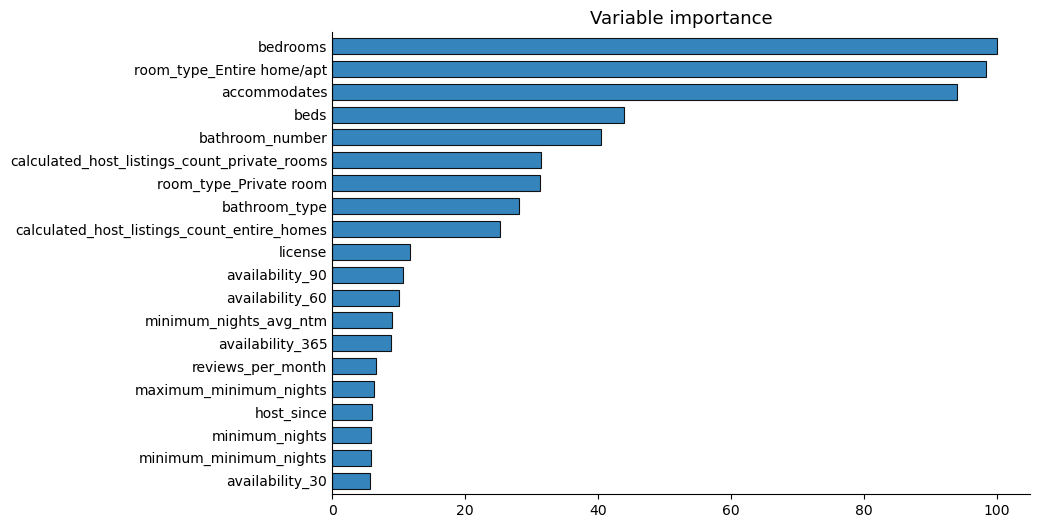

In [89]:
#variable importance plot
plot_feature_importance(rf_final, labels=X_train_tree.columns)
plt.show()

In [90]:
#Valid Metrics
mse_valid_rf2 = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_rf2 = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_rf2 = r2_score(y_valid_tree, pred_valid_tree) 

In [91]:
print(f"MSE: {mse_valid_rf2:.3f}")
print(f"RMSLE: {rmsle_valid_rf2:.3f}")
print(f"R2: {r2_valid_rf2:.3f}")

MSE: 208852.178
RMSLE: 3.639
R2: 0.734


## GradientBoosting

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)

In [93]:
# model optimisation preparation
params = {'loss':['squared_error','huber', 'absolute_error'],
          'n_estimators':np.arange(10, 200, 10),
          'learning_rate':np.arange(0.1, 1, 10),
          'max_depth':np.arange(1, 6),
          'subsample':[0.8,1.0]}

In [94]:
#Randomized Search

rs = RandomizedSearchCV(gb, params, n_iter=40, cv=3, scoring='neg_mean_squared_error',random_state=0)
rs.fit(X_train_tree, y_train_tree)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=40,
                   param_distributions={'learning_rate': array([0.1]),
                                        'loss': ['squared_error', 'huber',
                                                 'absolute_error'],
                                        'max_depth': array([1, 2, 3, 4, 5]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'subsample': [0.8, 1.0]},
                   random_state=0, scoring='neg_mean_squared_error')

In [95]:
params = rs.best_params_
params

{'subsample': 0.8,
 'n_estimators': 190,
 'max_depth': 5,
 'loss': 'squared_error',
 'learning_rate': 0.1}

In [96]:
gb_final = GradientBoostingRegressor(random_state=0, **params)
gb_final.fit(X_train_tree, y_train_tree)

GradientBoostingRegressor(max_depth=5, n_estimators=190, random_state=0,
                          subsample=0.8)

In [97]:
#residuals
pred_train_tree = gb_final.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = gb_final.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [98]:
#train Metrics
mse_train_gb = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_gb = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_gb = r2_score(y_train_tree, pred_train_tree) 

In [99]:
#print(rmse_train_gb)
#print(msle_train_gb)
#print(r2_train_gb)

print(f"MSE: {mse_train_gb:.3f}")
print(f"RMSLE: {rmsle_train_gb:.3f}")
print(f"R2: {r2_train_gb:.3f}")

MSE: 326898.473
RMSLE: 3.569
R2: 0.839


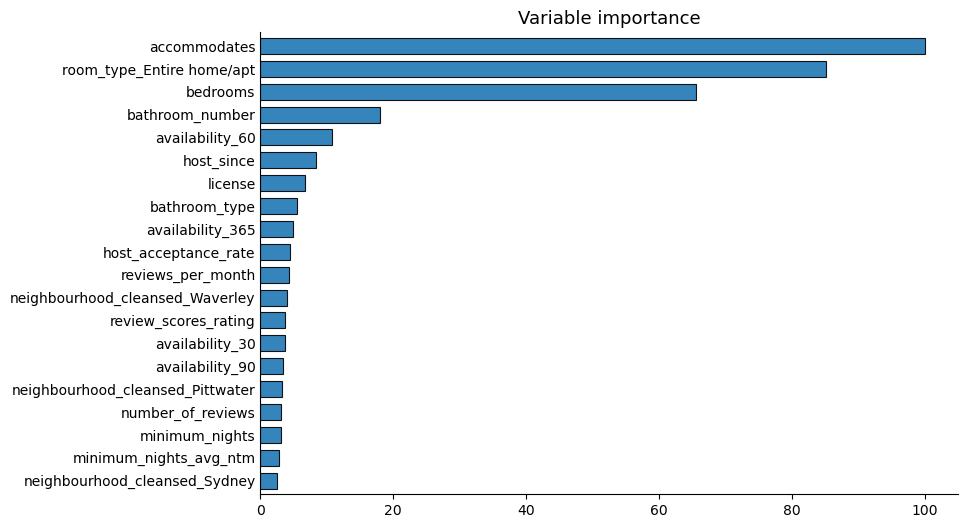

In [100]:
plot_feature_importance(gb_final, labels=X_train_tree.columns)
plt.show()

In [101]:
#Valid Metrics
mse_valid_gb = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_gb = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_gb = r2_score(y_valid_tree, pred_valid_tree) 


In [102]:
print(f"MSE: {mse_valid_gb:.3f}")
print(f"RMSLE: {rmsle_valid_gb:.3f}")
print(f"R2: {r2_valid_gb:.3f}")

MSE: 268340.628
RMSLE: 3.603
R2: 0.767


## XGBoosting

In [103]:
import xgboost

### XGB 1

In [104]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0, objective='reg:squarederror')

In [105]:
# model optimisation preparation
hyperparams = {#'scale_pos_weight':np.logspace(1,2.5,100),
                      'n_estimators':np.arange(1,200),
                      'learning_rate':np.linspace(0.1,1,10),
                      'max_depth':np.arange(1,50),
                      'subsample':np.linspace(0.5,1.0,6)}

In [106]:
#Randomized Search
rs = RandomizedSearchCV(xgb, hyperparams, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=0)
rs.fit(X_train_tree, y_train_tree)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=0, scoring='neg_mean_squared_error')

In [107]:
params = rs.best_params_
params

{'subsample': 1.0,
 'n_estimators': 132,
 'max_depth': 5,
 'learning_rate': 0.30000000000000004}

In [108]:
xgb_1 = XGBRegressor(random_state=0,**params)
xgb_1.fit(X_train_tree, y_train_tree)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.30000000000000004,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=132, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [109]:
#residuals
pred_train_tree = xgb_1.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = xgb_1.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [110]:
#train Metrics
mse_train_xgb = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_xgb = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_xgb = r2_score(y_train_tree, pred_train_tree) 

In [111]:
print(f"MSE: {mse_train_xgb:.3f}")
print(f"RMSLE: {rmsle_train_xgb:.3f}")
print(f"R2: {r2_train_xgb:.3f}")

MSE: 404543.237
RMSLE: 3.552
R2: 0.865


In [112]:
#Valid Metrics
mse_valid_xgb = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_xgb = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_xgb = r2_score(y_valid_tree, pred_valid_tree) 

In [113]:
print(f"MSE: {mse_valid_xgb:.3f}")
print(f"RMSLE: {rmsle_valid_xgb:.3f}")
print(f"R2: {r2_valid_xgb:.3f}")

MSE: 282382.177
RMSLE: 3.658
R2: 0.763


### XGB 2

In [114]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0, objective='reg:squarederror')

In [115]:
# model optimisation preparation
hyperparams = {#'scale_pos_weight':np.logspace(1,2.5,100),
                      'n_estimators':np.arange(10,200,10),
                      'learning_rate':np.linspace(0.1,1,10),
                      'max_depth':np.arange(1,50),
                      'subsample':np.linspace(0.5,1.0,6)}

In [116]:
#Randomized Search
rs_2 = RandomizedSearchCV(xgb, hyperparams, n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=0)
rs_2.fit(X_train_tree, y_train_tree)# model optimisation preparation

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=0, scoring='neg_mean_squared_error')

In [117]:
params = rs_2.best_params_
params

{'subsample': 0.7, 'n_estimators': 190, 'max_depth': 24, 'learning_rate': 0.1}

In [118]:
xgb_2 = XGBRegressor(random_state=0,**params)
xgb_2.fit(X_train_tree, y_train_tree)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=24, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=190, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [119]:
#residuals
pred_train_tree = xgb_2.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = xgb_2.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [120]:
#train Metrics
mse_train_xgb2 = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_xgb2 = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_xgb2 = r2_score(y_train_tree, pred_train_tree) 

In [121]:
print(f"MSE: {mse_train_xgb2:.3f}")
print(f"RMSLE: {rmsle_train_xgb2:.3f}")
print(f"R2: {r2_train_xgb2:.3f}")

MSE: 1030667.172
RMSLE: 3.493
R2: 1.000


In [122]:
#Valid Metrics
mse_valid_xgb2 = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_xgb2 = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_xgb2 = r2_score(y_valid_tree, pred_valid_tree) 

In [123]:
print(f"MSE: {mse_valid_xgb2:.3f}")
print(f"RMSLE: {rmsle_valid_xgb2:.3f}")
print(f"R2: {r2_valid_xgb2:.3f}")

MSE: 277730.416
RMSLE: 3.623
R2: 0.744


### XGB final

In [124]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0, objective='reg:squarederror')

In [125]:
# model optimisation preparation
hyperparams = {#'scale_pos_weight':np.logspace(1,2.5,100),
               'n_estimators':np.arange(10,300, 10),
               'learning_rate':np.linspace(0.01,0.05,10),
               'max_depth':np.arange(1,10),
               'subsample':np.linspace(0.6,0.8,10)}

In [126]:
#Randomized Search
rs_3 = RandomizedSearchCV(xgb, hyperparams, n_iter=120, cv=3, scoring='neg_mean_squared_error', random_state=0)
rs_3.fit(X_train_tree, y_train_tree)# model optimisation preparation

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ]),
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290]),
                                        'subsample': array([0.6       , 0.62222222, 0.64444444, 0.66666667, 0.68888889,
       0.71111111, 0.73333333, 0.75555556, 0.77777778, 0.8       ])},
                   random_state=0, scoring='neg_mean_squared_error')

In [127]:
params = rs_3.best_params_
params

{'subsample': 0.6222222222222222,
 'n_estimators': 280,
 'max_depth': 8,
 'learning_rate': 0.04111111111111111}

In [128]:
xgb_final = XGBRegressor(random_state=0, **params)
xgb_final.fit(X_train_tree, y_train_tree)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04111111111111111,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=280, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [129]:
#residuals
pred_train_tree = xgb_final.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = xgb_final.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [130]:
#train Metrics
mse_train_xgb3 = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_xgb3 = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_xgb3 = r2_score(y_train_tree, pred_train_tree) 

In [131]:
print(f"MSE: {mse_train_xgb3:.3f}")
print(f"RMSLE: {rmsle_train_xgb3:.3f}")
print(f"R2: {r2_train_xgb3:.3f}")

MSE: 341924.641
RMSLE: 3.537
R2: 0.882


In [132]:
#Valid Metrics
mse_valid_xgb3 = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_xgb3 = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_xgb3 = r2_score(y_valid_tree, pred_valid_tree) 


In [133]:
print(f"MSE: {mse_valid_xgb3:.3f}")
print(f"RMSLE: {rmsle_valid_xgb3:.3f}")
print(f"R2: {r2_valid_xgb3:.3f}")

MSE: 262734.629
RMSLE: 3.622
R2: 0.776


**adjust hyperparameters**

In [134]:
xgb_final_2 = XGBRegressor(random_state=0, objective='reg:squarederror', subsample = 0.65, n_estimators=280, max_depth=8, learning_rate=0.05)
xgb_final_2.fit(X_train_tree, y_train_tree)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=280, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [135]:
#residuals
pred_train_tree = xgb_final_2.predict(X_train_tree.to_numpy())
residuals_train_tree = y_train_tree - pred_train_tree

pred_valid_tree = xgb_final_2.predict(X_valid_tree.to_numpy())
residuals_valid_tree = y_valid_tree - pred_valid_tree

#adjust
adjust_train_tree = np.exp(residuals_train_tree).mean()
adjust_valid_tree = np.exp(residuals_valid_tree).mean()

In [136]:
#train Metrics
mse_train_xgb4 = mean_squared_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree) #mse
rmsle_train_xgb4 = np.sqrt(mean_squared_log_error(y_train_tree, np.exp(pred_train_tree)*adjust_train_tree))#rmsle
r2_train_xgb4 = r2_score(y_train_tree, pred_train_tree) 

In [137]:
print(f"MSE: {mse_train_xgb4:.3f}")
print(f"RMSLE: {rmsle_train_xgb4:.3f}")
print(f"R2: {r2_train_xgb4:.3f}")

MSE: 370865.518
RMSLE: 3.529
R2: 0.895


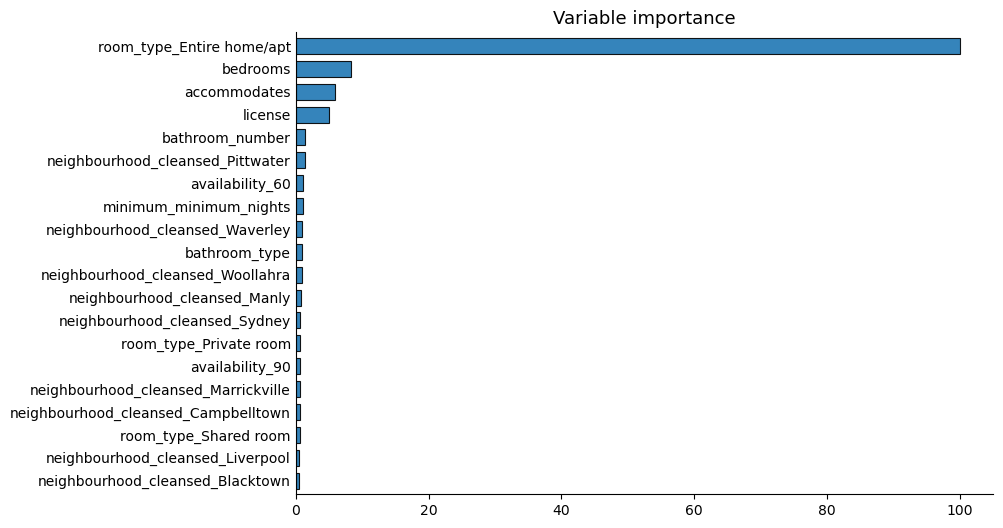

In [138]:
#variable importance plot
plot_feature_importance(xgb_final_2, labels=X_train_tree.columns)
plt.show()

In [139]:
#Valid Metrics
mse_valid_xgb4 = mean_squared_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree) #mse
rmsle_valid_xgb4 = np.sqrt(mean_squared_log_error(y_valid_tree, np.exp(pred_valid_tree)*adjust_valid_tree))#rmsle
r2_valid_xgb4 = r2_score(y_valid_tree, pred_valid_tree) 


In [140]:
print(f"MSE: {mse_valid_xgb4:.3f}")
print(f"RMSLE: {rmsle_valid_xgb4:.3f}")
print(f"R2: {r2_valid_xgb4:.3f}")

MSE: 263575.222
RMSLE: 3.607
R2: 0.776


## Model selection

### Best linear model

In [141]:
print('For linear regression:')
for metric_name, score in best_scores_linear.items():
    print(f"{metric_name}: {score:.2f}")
print('\nFor lasso:')
for metric_name, score in best_scores_lasso.items():
    print(f"{metric_name}: {score:.2f}")
print('\nFor Ridge:')
for metric_name, score in best_scores_ridge.items():
    print(f"{metric_name}: {score:.2f}")
print('\nFor Elastic net:')
for metric_name, score in best_scores_elastic.items():
    print(f"{metric_name}: {score:.2f}")


For linear regression:
mse: 0.28
rmse: 0.28
mae: 0.38
rmsle: 0.78
r2: 0.72

For lasso:
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.78
r2: 0.73

For Ridge:
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.79
r2: 0.72

For Elastic net:
mse: 0.27
rmse: 0.27
mae: 0.38
rmsle: 0.77
r2: 0.73


In [142]:
import pandas as pd

data = {
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net'],
    'mse': [best_scores_linear['mse'], best_scores_lasso['mse'], best_scores_ridge['mse'],
            best_scores_elastic['mse']],
    'rmse': [best_scores_linear['rmse'], best_scores_lasso['rmse'], best_scores_ridge['rmse'],
             best_scores_elastic['rmse']],
    'mae': [best_scores_linear['mae'], best_scores_lasso['mae'], best_scores_ridge['mae'],
            best_scores_elastic['mae']],
    'rmsle': [best_scores_linear['rmsle'], best_scores_lasso['rmsle'], best_scores_ridge['rmsle'],
              best_scores_elastic['rmsle']],
    'r2': [best_scores_linear['r2'], best_scores_lasso['r2'], best_scores_ridge['r2'],
           best_scores_elastic['r2']]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))


            Model      mse     rmse      mae    rmsle       r2
Linear Regression 0.279466 0.279466 0.378397 0.781678 0.720895
            Lasso 0.273519 0.273519 0.378286 0.780290 0.726441
            Ridge 0.274870 0.274870 0.377928 0.791272 0.724949
      Elastic Net 0.272927 0.272927 0.377815 0.768649 0.727042


In [143]:
# Elastic Net is best linear model

### Best tree model

In [144]:
import pandas as pd

model_names = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBoosting']
metric_names = ['mse', 'rmsle', 'r2']

metrics_table = pd.DataFrame(index=model_names, columns=metric_names)



# 假设 metrics_stack_scores 是一个包含各个模型指标结果的字典，键为模型名称，值为指标结果
#for model_name, metrics_scores in metrics_stack_scores.items():
    #for metric_name, metric_score in metrics_scores.items():
       # metrics_table.loc[model_name, metric_name] = metric_score
metrics_table.iloc[0,0] = mse_valid_dt
metrics_table.iloc[0,1] = rmsle_valid_dt
metrics_table.iloc[0,2] = r2_valid_dt
metrics_table.iloc[1,0] = mse_valid_rf2
metrics_table.iloc[1,1] = rmsle_valid_rf2
metrics_table.iloc[1,2] = r2_valid_rf2
metrics_table.iloc[2,0] = mse_valid_gb
metrics_table.iloc[2,1] = rmsle_valid_gb
metrics_table.iloc[2,2] = r2_valid_gb
metrics_table.iloc[3,0] = mse_valid_xgb4
metrics_table.iloc[3,1] = rmsle_valid_xgb4
metrics_table.iloc[3,2] = r2_valid_xgb4



In [145]:
metrics_table

,mse,rmsle,r2
DecisionTree,175252.919828,3.692869,0.619135
RandomForest,208852.178013,3.638506,0.73382
GradientBoosting,268340.628307,3.603349,0.767211
XGBoosting,263575.222049,3.606827,0.775945


In [146]:
## XGBoosting is the best tree model

### Final model

#### New best tree model -XGBoosting

In [147]:

train_new_xgb_final_2= train_tree.copy()
valid_new_xgb_final_2 = valid_tree.copy()
test_new_xgb_final_2 = test_tree.copy()

In [148]:
# Standardisation-train set
scaled_train_new_xgb_final_2 = StandardScaler().fit_transform(train_new_xgb_final_2)
scaled_train_new_xgb_final_2_df = pd.DataFrame(scaled_train_new_xgb_final_2, columns=train_new_xgb_final_2.columns)

# Standardisation-validation set
scaled_valid_new_xgb_final_2 = StandardScaler().fit_transform(valid_new_xgb_final_2)
scaled_valid_new_xgb_final_2_df = pd.DataFrame(scaled_valid_new_xgb_final_2, columns=valid_new_xgb_final_2.columns)

# Standardisation-test set
scaled_test_new_xgb_final_2 = StandardScaler().fit_transform(test_new_xgb_final_2)
scaled_test_new_xgb_final_2_df = pd.DataFrame(scaled_test_new_xgb_final_2, columns=test_new_xgb_final_2.columns)


In [149]:
X_train_new_xgb_final_2 = scaled_train_new_xgb_final_2_df.drop(['price','log_price'], axis=1)
log_y_train_new_xgb_final_2 = scaled_train_new_xgb_final_2_df['log_price']
y_train_new_xgb_final_2 = scaled_train_new_xgb_final_2_df['price']

X_valid_new_xgb_final_2 = scaled_valid_new_xgb_final_2_df.drop(['price','log_price'], axis=1)
log_y_valid_new_xgb_final_2 = scaled_valid_new_xgb_final_2_df['log_price']
y_valid_new_xgb_final_2 = scaled_valid_new_xgb_final_2_df['price']


In [150]:
from xgboost import XGBRegressor

new_xgb = XGBRegressor(random_state=0, objective='reg:squarederror')

In [151]:
# model optimisation preparation
hyperparams = {#'scale_pos_weight':np.logspace(1,2.5,100),
               'n_estimators':np.arange(10,300, 10),
               'learning_rate':np.linspace(0.01,0.05,10),
               'max_depth':np.arange(1,10),
               'subsample':np.linspace(0.6,0.8,10)}

In [152]:
#Randomized Search
rs_new_3 = RandomizedSearchCV(new_xgb, hyperparams, n_iter=120, cv=3, scoring='neg_mean_squared_error', random_state=0)
rs_new_3.fit(X_train_new_xgb_final_2, log_y_train_new_xgb_final_2)# model optimisation preparation

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ]),
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290]),
                                        'subsample': array([0.6       , 0.62222222, 0.64444444, 0.66666667, 0.68888889,
       0.71111111, 0.73333333, 0.75555556, 0.77777778, 0.8       ])},
                   random_state=0, scoring='neg_mean_squared_error')

In [153]:
new_params = rs_new_3.best_params_
new_params

{'subsample': 0.6222222222222222,
 'n_estimators': 280,
 'max_depth': 8,
 'learning_rate': 0.04111111111111111}

In [154]:
new_xgb_final_2 = XGBRegressor(random_state=0, objective='reg:squarederror', subsample = 0.65, n_estimators=280, max_depth=8, learning_rate=0.05)
new_xgb_final_2.fit(X_train_new_xgb_final_2, log_y_train_new_xgb_final_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=280, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [155]:
#residuals
pred_train_new_xgb_final_2 = new_xgb_final_2.predict(X_train_new_xgb_final_2.to_numpy())
residuals_train_new_xgb_final_2 = log_y_train_new_xgb_final_2 - pred_train_new_xgb_final_2

pred_valid_new_xgb_final_2 = new_xgb_final_2.predict(X_valid_new_xgb_final_2.to_numpy())
residuals_valid_new_xgb_final_2 = log_y_valid_new_xgb_final_2 - pred_valid_new_xgb_final_2

#adjust
adjust_train_new_xgb_final_2 = np.exp(residuals_train_new_xgb_final_2).mean()
adjust_valid_new_xgb_final_2 = np.exp(residuals_valid_new_xgb_final_2).mean()

In [156]:
#train Metrics
mse_train_new_xgb_final_2 = mean_squared_error(log_y_train_new_xgb_final_2, np.exp(pred_train_new_xgb_final_2)*adjust_train_new_xgb_final_2) #mse
rmsle_train_new_xgb_final_2 = np.sqrt(mean_squared_error(log_y_train_new_xgb_final_2, np.exp(pred_train_new_xgb_final_2)*adjust_train_new_xgb_final_2))#rmsle
r2_train_new_xgb_final_2 = r2_score(y_train_new_xgb_final_2, pred_train_new_xgb_final_2) 

In [157]:
print(f"MSE: {mse_train_new_xgb_final_2:.3f}")
print(f"RMSLE: {rmsle_train_new_xgb_final_2:.3f}")
print(f"R2: {r2_train_new_xgb_final_2:.3f}")

MSE: 16.149
RMSLE: 4.019
R2: -0.004


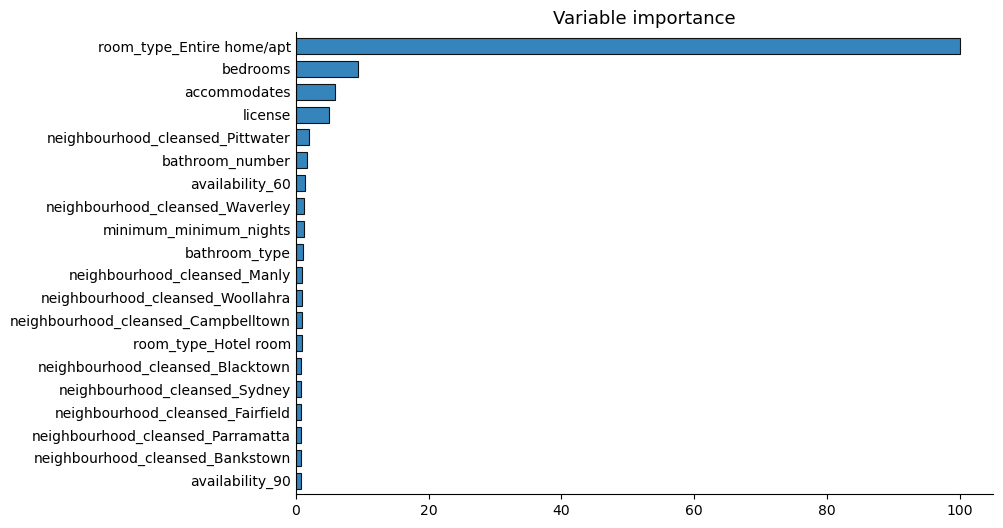

In [158]:
#variable importance plot
plot_feature_importance(new_xgb_final_2, labels=X_train_new_xgb_final_2.columns)
plt.show()

In [159]:
#Valid Metrics
mse_valid_new_xgb_final_2 = mean_squared_error(log_y_valid_new_xgb_final_2, np.exp(pred_valid_new_xgb_final_2)*adjust_valid_new_xgb_final_2) #mse
rmsle_valid_new_xgb_final_2 = np.sqrt(mean_squared_error(log_y_valid_new_xgb_final_2, np.exp(pred_valid_new_xgb_final_2)*adjust_valid_new_xgb_final_2))#rmsle
r2_valid_new_xgb_final_2 = r2_score(y_valid_new_xgb_final_2, pred_valid_new_xgb_final_2) 


In [160]:
print(f"MSE: {mse_valid_new_xgb_final_2:.3f}")
print(f"RMSLE: {rmsle_valid_new_xgb_final_2:.3f}")
print(f"R2: {r2_valid_new_xgb_final_2:.3f}")

MSE: 6.998
RMSLE: 2.645
R2: 0.108


#### Final model

In [161]:
X_train_final_stack = X_train_elastic.copy()
log_y_train_final_stack = log_y_train_elastic.copy()
y_train_final_stack= y_train_elastic.copy()

X_valid_final_stack = X_valid_elastic.copy()
log_y_valid_final_stack = log_y_valid_elastic.copy()
y_valid_final_stack= y_valid_elastic.copy()

In [162]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression



estimators = [
    ('new_xgb_final_2', new_xgb_final_2),
    ('elastic net', elastic_net)
]


final_stack = StackingRegressor(estimators=estimators, final_estimator=new_xgb_final_2)




In [163]:
final_stack.fit(X_train_final_stack.to_numpy(), log_y_train_final_stack)

print('Train:')
feature_importances = final_stack.final_estimator_.feature_importances_
for i, importance in enumerate(feature_importances):
    print('Feature {}: Importance Score {:.2f}'.format(i+1, importance))


Train:
Feature 1: Importance Score 0.88
Feature 2: Importance Score 0.12


In [164]:
# Residuals
fit_train_final_stack = final_stack.predict(X_train_final_stack.to_numpy())
residuals_train_final_stack = log_y_train_final_stack - fit_train_final_stack

fit_valid_final_stack = final_stack.predict(X_valid_final_stack.to_numpy())
residuals_valid_final_stack = log_y_valid_final_stack - fit_valid_final_stack

# adjust 
adjust_train_final_stack = np.exp(residuals_train_final_stack).mean()
adjust_valid_final_stack = np.exp(residuals_valid_final_stack).mean()

pred_train_final_stack = np.exp(fit_train_final_stack) * adjust_train_final_stack
pred_valid_final_stack = np.exp(fit_valid_final_stack) * adjust_valid_final_stack



#### Validation set

In [165]:

# rmsle
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(1 + y_true) - np.log(1 + y_pred))))

# rmse
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics_final_stack = {
    'mse': mean_squared_error,
    'rmse': rmse,
    'mae': mean_absolute_error,
    'rmsle': rmsle,
    'r2': r2_score
}

metrics_final_stack_scores = {}
for metrics_final_stack_name, metrics_final_stack_func in metrics_final_stack.items():
    metrics_final_stack_score = metrics_final_stack_func(y_valid_final_stack, pred_valid_final_stack)
    metrics_final_stack_scores[metrics_final_stack_name] = metrics_final_stack_score.mean()

r2_score_final_stack = r2_score(log_y_valid_final_stack, fit_valid_final_stack)
metrics_final_stack_scores['r2'] = r2_score_final_stack

print('For log_price:')

print('\nMetrics:')
for metric_final_stack_name, metric_final_stack_score in metrics_final_stack_scores.items():
    print('Validation {}: {:.2f}'.format(metric_final_stack_name, metric_final_stack_score))


For log_price:

Metrics:
Validation mse: 8.89
Validation rmse: 2.98
Validation mae: 2.04
Validation rmsle: 1.09
Validation r2: 0.75


#### Cross-Validation

In [166]:
cv_values = [2, 3, 4, 5]  
scoring_metrics = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'rmsle': make_scorer(rmsle),
    'r2': make_scorer(r2_score)
}
best_cv_final_stack = None
best_scores_final_stack = None

for cv in cv_values:
    scores_final_stack = {}
    for metric_name, scoring_metric in scoring_metrics.items():
        cv_scores_final_stack = cross_val_score(final_stack, X_valid_final_stack, log_y_valid_final_stack, cv=cv,
                                          scoring=scoring_metric)
        scores_final_stack[metric_name] = cv_scores_final_stack.mean()
    
    if best_scores_final_stack is None or scores_final_stack['rmsle'] < best_scores_final_stack['rmsle']:
        best_cv_final_stack = cv
        best_scores_final_stack = scores_final_stack
    
    print(f"\nCV = {cv}")
    for metric_name, score in scores_final_stack.items():
        print(f"{metric_name}: {score:.4f}")

print(f"\nBest CV: {best_cv_final_stack}")
print("Best Scores:")
for metric_name, score in best_scores_final_stack.items():
    print(f"{metric_name}: {score:.2f}")



CV = 2
mse: 0.3426
rmse: 0.3426
mae: 0.4211
rmsle: 0.8211
r2: 0.6565

CV = 3
mse: 0.3073
rmse: 0.3073
mae: 0.4014
rmsle: 0.7824
r2: 0.6915

CV = 4
mse: 0.3051
rmse: 0.3051
mae: 0.3959
rmsle: 0.8217
r2: 0.6945

CV = 5
mse: 0.3026
rmse: 0.3026
mae: 0.3906
rmsle: 0.8085
r2: 0.6976

Best CV: 3
Best Scores:
mse: 0.31
rmse: 0.31
mae: 0.40
rmsle: 0.78
r2: 0.69


## Conclusion

In [167]:
# Merge train set and validation set for Elastic net
train_data_final_stack = train_tree.append(valid_tree)
test_data_final_stack = test_tree.copy()


In [168]:
scaler = StandardScaler()
# Standardisation-train set
scaled_train_data_final_stack = scaler.fit_transform(train_data_final_stack)
scaled_train_data_final_stack_df = pd.DataFrame(scaled_train_data_final_stack, 
                                                columns=train_data_final_stack.columns)


# Standardisation-test set
scaled_test_data_final_stack = scaler.fit_transform(test_data_final_stack)
scaled_test_data_final_stack_df = pd.DataFrame(scaled_test_data_final_stack, 
                                                columns=test_data_final_stack.columns)




In [169]:
X_final_train = scaled_train_data_final_stack_df.drop(['price', 'log_price'], axis=1)
log_y_final_train = scaled_train_data_final_stack_df['log_price']
y_final_train = scaled_train_data_final_stack_df['price']

X_final_test = scaled_test_data_final_stack_df.drop(['price', 'log_price'], axis=1)
log_y_final_test = scaled_test_data_final_stack_df['log_price']
y_final_test = scaled_test_data_final_stack_df['price']






In [170]:
fit_final_test = final_stack.predict(X_final_test.to_numpy())
residuals_final_test = log_y_final_test - fit_final_test



# adjust

adjust_final_test = np.exp(residuals_final_test).mean()

pred_final_test = np.exp(fit_final_test) * adjust_final_test



In [171]:
pred_final_test

array([10.554416 ,  1.9456738,  1.5238956, ...,  5.6579633,  1.9855682,
        1.4999741], dtype=float32)

In [172]:
pred_final_test.shape

(4420,)

In [173]:
mean_final_stack = train_data_final_stack['price'].mean()
std_final_stack = train_data_final_stack['price'].std()

In [174]:
mean_final_stack 

320.80713235294115

In [175]:

std_final_stack

904.9898120767227

#### Final predictions

In [176]:

final_predictions = pred_final_test * std_final_stack  + mean_final_stack
final_predictions_formatted = ["{:.2f}".format(num) for num in final_predictions]

In [177]:
final_predictions_formatted

['9872.45',
 '2081.62',
 '1699.92',
 '4000.80',
 '1674.06',
 '1348.80',
 '3610.03',
 '1766.44',
 '2711.92',
 '1280.76',
 '4538.73',
 '990.42',
 '4773.14',
 '8300.12',
 '1345.80',
 '2282.24',
 '825.93',
 '705.81',
 '1235.80',
 '923.39',
 '1344.42',
 '2395.75',
 '1811.42',
 '2605.21',
 '782.42',
 '3210.51',
 '6200.52',
 '1693.43',
 '1685.13',
 '2189.38',
 '1689.51',
 '788.17',
 '649.05',
 '793.02',
 '828.14',
 '5248.72',
 '834.94',
 '1828.68',
 '803.75',
 '605.18',
 '809.44',
 '730.84',
 '1090.80',
 '1526.44',
 '2798.34',
 '5165.88',
 '1425.60',
 '1247.18',
 '2010.64',
 '2332.99',
 '2808.79',
 '2320.37',
 '3203.82',
 '2680.47',
 '726.28',
 '1407.77',
 '4460.27',
 '739.43',
 '1932.74',
 '755.54',
 '767.26',
 '854.35',
 '2377.30',
 '9098.78',
 '785.40',
 '750.49',
 '3837.42',
 '4757.59',
 '1532.79',
 '1157.15',
 '658.77',
 '3082.81',
 '681.47',
 '2117.07',
 '1247.41',
 '1284.60',
 '1668.50',
 '1412.76',
 '1185.39',
 '968.35',
 '2677.74',
 '2205.07',
 '11654.24',
 '1916.04',
 '1658.13',
 '1

In [178]:
final_predictions.shape

(4420,)

# Revenue

In [179]:
# data = pd.read_csv("data.csv")
test_tree['occupancy_rate'] = 1 - (test_tree['availability_365'] / 365)

In [180]:
annual_income = final_predictions*test_tree['occupancy_rate']*365
annual_income

0       1.184693e+05
1       6.515477e+05
2       3.127847e+05
3       2.480494e+05
4       4.218619e+05
            ...     
4415    5.257553e+05
4416    2.753136e+05
4417    1.926187e+06
4418    1.694181e+05
4419    3.356537e+05
Name: occupancy_rate, Length: 4420, dtype: float64

In [181]:
annual_income_formatted = ["{:.2f}".format(num) for num in annual_income]
annual_income_formatted

['118469.34',
 '651547.71',
 '312784.75',
 '248049.41',
 '421861.94',
 '492313.40',
 '1281560.66',
 '263199.92',
 '837984.39',
 '467477.76',
 '1656636.62',
 '361501.87',
 '1680144.64',
 '199202.86',
 '397009.65',
 '0.00',
 '301465.18',
 '203980.09',
 '451066.80',
 '45245.93',
 '490711.85',
 '838512.84',
 '380398.82',
 '937876.82',
 '285585.08',
 '0.00',
 '2157781.82',
 '313285.44',
 '615073.92',
 '433497.99',
 '0.00',
 '277435.71',
 '236902.15',
 '289451.04',
 '302271.48',
 '1915781.27',
 '228772.32',
 '111549.54',
 '262826.41',
 '220891.03',
 '809.44',
 '200250.45',
 '200707.59',
 '557149.15',
 '775140.00',
 '258293.82',
 '0.00',
 '2494.37',
 '733882.36',
 '6998.96',
 '1025207.47',
 '526724.68',
 '1098910.95',
 '978373.32',
 '0.00',
 '513836.81',
 '1547714.88',
 '102041.73',
 '355623.96',
 '219106.04',
 '280049.97',
 '0.00',
 '751228.36',
 '2838817.92',
 '18849.50',
 '273929.83',
 '1055289.54',
 '951518.65',
 '95033.27',
 '422358.69',
 '240452.46',
 '1125224.16',
 '248734.98',
 '77273

In [182]:
average_income = annual_income/365
average_income_formatted = ["{:.2f}".format(num) for num in average_income]

In [183]:
average_income_formatted

['324.57',
 '1785.06',
 '856.94',
 '679.59',
 '1155.79',
 '1348.80',
 '3511.13',
 '721.10',
 '2295.85',
 '1280.76',
 '4538.73',
 '990.42',
 '4603.14',
 '545.76',
 '1087.70',
 '0.00',
 '825.93',
 '558.85',
 '1235.80',
 '123.96',
 '1344.42',
 '2297.30',
 '1042.19',
 '2569.53',
 '782.42',
 '0.00',
 '5911.73',
 '858.32',
 '1685.13',
 '1187.67',
 '0.00',
 '760.10',
 '649.05',
 '793.02',
 '828.14',
 '5248.72',
 '626.77',
 '305.62',
 '720.07',
 '605.18',
 '2.22',
 '548.63',
 '549.88',
 '1526.44',
 '2123.67',
 '707.65',
 '0.00',
 '6.83',
 '2010.64',
 '19.18',
 '2808.79',
 '1443.08',
 '3010.71',
 '2680.47',
 '0.00',
 '1407.77',
 '4240.31',
 '279.57',
 '974.31',
 '600.29',
 '767.26',
 '0.00',
 '2058.16',
 '7777.58',
 '51.64',
 '750.49',
 '2891.20',
 '2606.90',
 '260.37',
 '1157.15',
 '658.77',
 '3082.81',
 '681.47',
 '2117.07',
 '1247.41',
 '1284.60',
 '1444.51',
 '127.73',
 '889.85',
 '26.53',
 '66.03',
 '2205.07',
 '8780.59',
 '918.65',
 '1658.13',
 '1367.36',
 '792.83',
 '747.38',
 '1096.93',